In [1]:
## Import necessary libraries
import numpy as np
import pandas as pd

## Import matplotlib for basic plotting
import matplotlib.pyplot as plt
from matplotlib import colors

## Import seaborn for statistical data visualization
import seaborn as sns

## Import plotly for interactive visualizations
import plotly.express as px
import plotly.io as pio

## Import os module for interacting with the operating system
import os

In [2]:
os.getcwd()

'C:\\Users\\thara\\Machine Learning\\Airline Passenger Satisfaction'

In [4]:
## OverSampling
from imblearn.over_sampling import SMOTE

## sklearn (preprocessing)
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, OrdinalEncoder,RobustScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.ensemble import VotingClassifier

## sklearn (feature selection)
from sklearn.feature_selection import SelectKBest, f_classif, chi2

In [5]:
## sklearn (metrics)
from sklearn.metrics import f1_score, accuracy_score, make_scorer, confusion_matrix, classification_report, precision_score, recall_score

## sklearn (tuning)
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [6]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [9]:
### Initial settings
import matplotlib
import warnings
%matplotlib inline
sns.set_style("darkgrid")
matplotlib.rcParams["font.size"] = 10
matplotlib.rcParams["figure.figsize"] = (8,6)
matplotlib.rcParams["figure.facecolor"] = '#00000000' 
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid",
            ) 

warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)

In [12]:
## Define the path to the train.csv file
TRAIN_PATH = os.path.join(os.getcwd(), "train.csv")

In [13]:
## Read the train.csv file into a DataFrame, using "Unnamed: 0" column as the index
df_train = pd.read_csv(TRAIN_PATH, index_col="Unnamed: 0")

In [14]:
## Define the path to the test.csv file
TEST_PATH = os.path.join(os.getcwd(), "test.csv")

## Read the test.csv file into a DataFrame, using "Unnamed: 0" column as the index
df_test = pd.read_csv(TEST_PATH, index_col="Unnamed: 0")

## Concatenate the train and test DataFrames vertically to create a combined DataFrame
df = pd.concat([df_train, df_test], axis=0)

In [15]:
df.shape

(129880, 24)

In [16]:
# Check if the total number of rows in the combined (df) is equal to the sum of rows in the train and test DataFrames
# If the sum of rows in df_test and df_train is equal to the number of rows in df, the condition will evaluate True

df.shape[0] == df_test.shape[0] + df_train.shape[0]

True

In [17]:
df.head() ## show the 5th rows in the data

id  Gender      Customer Type  Age   Type of Travel     Class  \
0   70172    Male     Loyal Customer   13  Personal Travel  Eco Plus   
1    5047    Male  disloyal Customer   25  Business travel  Business   
2  110028  Female     Loyal Customer   26  Business travel  Business   
3   24026  Female     Loyal Customer   25  Business travel  Business   
4  119299    Male     Loyal Customer   61  Business travel  Business   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0              460                      3                                  4   
1              235                      3                                  2   
2             1142                      2                                  2   
3              562                      2                                  5   
4              214                      3                                  3   

   Ease of Online booking  ...  Inflight entertainment  On-board service  \
0                       3  ...                       5                 4   
1                       3  ...                       1                 1   
2                       2  ...                       5                 4   
3                       5  ...                       2                 2   
4                       3  ...                       3                 3   

   Leg room service  Baggage handling  Checkin service  Inflight service  \
0                 3                 4                4                 5   
1                 5                 3                1                 4   
2                 3                 4                4                 4   
3                 5                 3                1                 4   
4                 4                 4                3                 3   

   Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
0            5                          25                      18.0   
1            1                           1                       6.0   
2            5                           0                       0.0   
3            2                          11                       9.0   
4            3                           0                       0.0   

              satisfaction  
0  neutral or dissatisfied  
1  neutral or dissatisfied  
2                satisfied  
3  neutral or dissatisfied  
4                satisfied  

[5 rows x 24 columns]

In [27]:
round(df.describe().T,2) ## Statistical info. about numerical columns..

count     mean     std   min    25%  \
Age                                129880.0    39.43   15.12   7.0   27.0   
Flight Distance                    129880.0  1190.32  997.45  31.0  414.0   
Inflight wifi service              129880.0     2.73    1.33   0.0    2.0   
Departure/Arrival time convenient  129880.0     3.06    1.53   0.0    2.0   
Ease of Online booking             129880.0     2.76    1.40   0.0    2.0   
Gate location                      129880.0     2.98    1.28   0.0    2.0   
Food and drink                     129880.0     3.20    1.33   0.0    2.0   
Online boarding                    129880.0     3.25    1.35   0.0    2.0   
Seat comfort                       129880.0     3.44    1.32   0.0    2.0   
Inflight entertainment             129880.0     3.36    1.33   0.0    2.0   
On-board service                   129880.0     3.38    1.29   0.0    2.0   
Leg room service                   129880.0     3.35    1.32   0.0    2.0   
Baggage handling                   129880.0     3.63    1.18   1.0    3.0   
Checkin service                    129880.0     3.31    1.27   0.0    3.0   
Inflight service                   129880.0     3.64    1.18   0.0    3.0   
Cleanliness                        129880.0     3.29    1.31   0.0    2.0   
Departure Delay in Minutes         129880.0    14.71   38.07   0.0    0.0   
Arrival Delay in Minutes           129487.0    15.09   38.47   0.0    0.0   

                                     50%     75%     max  
Age                                 40.0    51.0    85.0  
Flight Distance                    844.0  1744.0  4983.0  
Inflight wifi service                3.0     4.0     5.0  
Departure/Arrival time convenient    3.0     4.0     5.0  
Ease of Online booking               3.0     4.0     5.0  
Gate location                        3.0     4.0     5.0  
Food and drink                       3.0     4.0     5.0  
Online boarding                      3.0     4.0     5.0  
Seat comfort                         4.0     5.0     5.0  
Inflight entertainment               4.0     4.0     5.0  
On-board service                     4.0     4.0     5.0  
Leg room service                     4.0     4.0     5.0  
Baggage handling                     4.0     5.0     5.0  
Checkin service                      3.0     4.0     5.0  
Inflight service                     4.0     5.0     5.0  
Cleanliness                          3.0     4.0     5.0  
Departure Delay in Minutes           0.0    12.0  1592.0  
Arrival Delay in Minutes             0.0    13.0  1584.0

Observations

1.The average delay in flights are 15 minutes, with a deviation of 38

2.Median of the delays are 0, which means 50% of the flights from this data, were not delayed

In [20]:
df.describe(include="object").T ## Statistical info. about Categorical columns..

count unique                      top    freq
Gender          129880      2                   Female   65899
Customer Type   129880      2           Loyal Customer  106100
Type of Travel  129880      2          Business travel   89693
Class           129880      3                 Business   62160
satisfaction    129880      2  neutral or dissatisfied   73452

In [21]:
df.dtypes ## Check the dataTypes..

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

In [22]:
df.drop("id",axis=1,inplace=True)

In [23]:
df.head(2)

Gender      Customer Type  Age   Type of Travel     Class  Flight Distance  \
0   Male     Loyal Customer   13  Personal Travel  Eco Plus              460   
1   Male  disloyal Customer   25  Business travel  Business              235   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   

   Ease of Online booking  Gate location  ...  Inflight entertainment  \
0                       3              1  ...                       5   
1                       3              3  ...                       1   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  

[2 rows x 23 columns]

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    129880 non

only (arrival dealy in minutes )has null values. Let's visulize this to see any patterns in the missing values

In [26]:
# Concatenate the count of null values and the percentage of null values into a single DataFrame
nullsFrame = pd.concat([df.isnull().sum(), round(df.isnull().mean() * 100,2)],
                       axis=1,
                       keys=["Count", "% of null values"])

## print the nullsFrame
print(f"The Data Frame of Missing Values in the Data : \n {nullsFrame}")

The Data Frame of Missing Values in the Data : 
                                    Count  % of null values
Gender                                 0               0.0
Customer Type                          0               0.0
Age                                    0               0.0
Type of Travel                         0               0.0
Class                                  0               0.0
Flight Distance                        0               0.0
Inflight wifi service                  0               0.0
Departure/Arrival time convenient      0               0.0
Ease of Online booking                 0               0.0
Gate location                          0               0.0
Food and drink                         0               0.0
Online boarding                        0               0.0
Seat comfort                           0               0.0
Inflight entertainment                 0               0.0
On-board service                       0               0.0
Leg roo

In [28]:
df.duplicated().sum()

0

#### Dependent Feature

In [31]:
df["satisfaction"].value_counts(normalize=True)*100

satisfaction
neutral or dissatisfied    56.553742
satisfied                  43.446258
Name: proportion, dtype: float64

This problem is a binary classification problem of classes 0 or 1 denoting customers satisfaction, The class 1 has only 43.33% total values. Hence, this is an balanced learning problem. Hence will not be requiring any resampling techniques to tackle this.

#### Independent features

In [34]:
df.columns[:-1]

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

#### EDA

Before training a machine learning model, its always a good idea to explore the distributions of various columns and see how they are related to the target column. Let's explore and visualize the data using the Plotly, Matplotlib and Seaborn libraries. Follow these tutorials to learn how to use these libraries:

In [37]:
df.corr(numeric_only=True)

Age  Flight Distance  \
Age                                1.000000         0.099459   
Flight Distance                    0.099459         1.000000   
Inflight wifi service              0.016116         0.006701   
Departure/Arrival time convenient  0.036960        -0.018914   
Ease of Online booking             0.022565         0.065165   
Gate location                     -0.000398         0.005520   
Food and drink                     0.023194         0.057066   
Online boarding                    0.207572         0.214825   
Seat comfort                       0.159136         0.157662   
Inflight entertainment             0.074947         0.130507   
On-board service                   0.057078         0.111194   
Leg room service                   0.039119         0.134533   
Baggage handling                  -0.047991         0.064855   
Checkin service                    0.033475         0.073608   
Inflight service                  -0.051347         0.059316   
Cleanliness                        0.052565         0.095648   
Departure Delay in Minutes        -0.009041         0.002402   
Arrival Delay in Minutes          -0.011248        -0.001935   

                                   Inflight wifi service  \
Age                                             0.016116   
Flight Distance                                 0.006701   
Inflight wifi service                           1.000000   
Departure/Arrival time convenient               0.344915   
Ease of Online booking                          0.714807   
Gate location                                   0.338573   
Food and drink                                  0.132214   
Online boarding                                 0.457445   
Seat comfort                                    0.121513   
Inflight entertainment                          0.207802   
On-board service                                0.119928   
Leg room service                                0.160317   
Baggage handling                                0.120376   
Checkin service                                 0.043762   
Inflight service                                0.110029   
Cleanliness                                     0.131300   
Departure Delay in Minutes                     -0.015946   
Arrival Delay in Minutes                       -0.017749   

                                   Departure/Arrival time convenient  \
Age                                                         0.036960   
Flight Distance                                            -0.018914   
Inflight wifi service                                       0.344915   
Departure/Arrival time convenient                           1.000000   
Ease of Online booking                                      0.437620   
Gate location                                               0.447510   
Food and drink                                              0.000687   
Online boarding                                             0.072287   
Seat comfort                                                0.008666   
Inflight entertainment                                     -0.008380   
On-board service                                            0.067297   
Leg room service                                            0.010617   
Baggage handling                                            0.070833   
Checkin service                                             0.091132   
Inflight service                                            0.072195   
Cleanliness                                                 0.009862   
Departure Delay in Minutes                                  0.000778   
Arrival Delay in Minutes                                   -0.000942   

                                   Ease of Online booking  Gate location  \
Age                                              0.022565      -0.000398   
Flight Distance                                  0.065165       0.005520   
Inflight wifi service                            0.714807       0.338573   
Departure

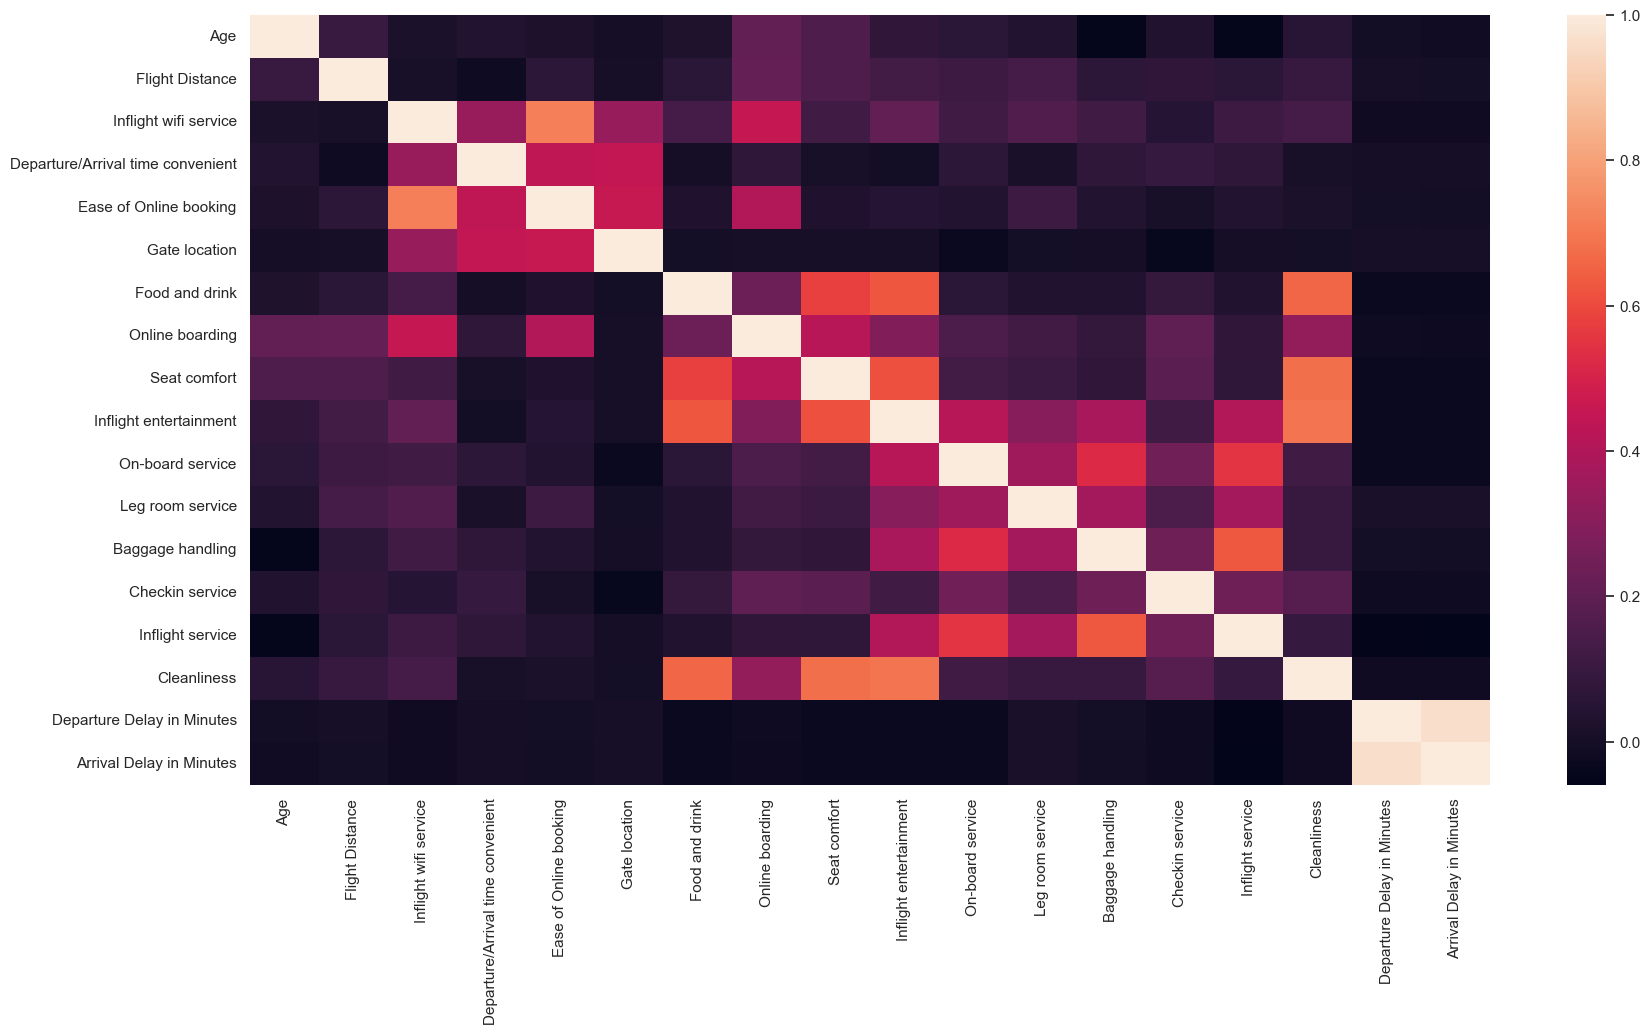

In [48]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(numeric_only=True))
plt.show()

Departure delay in minutes and arrival delay in minutes are highly co related.

#### Data Distribution Graphs

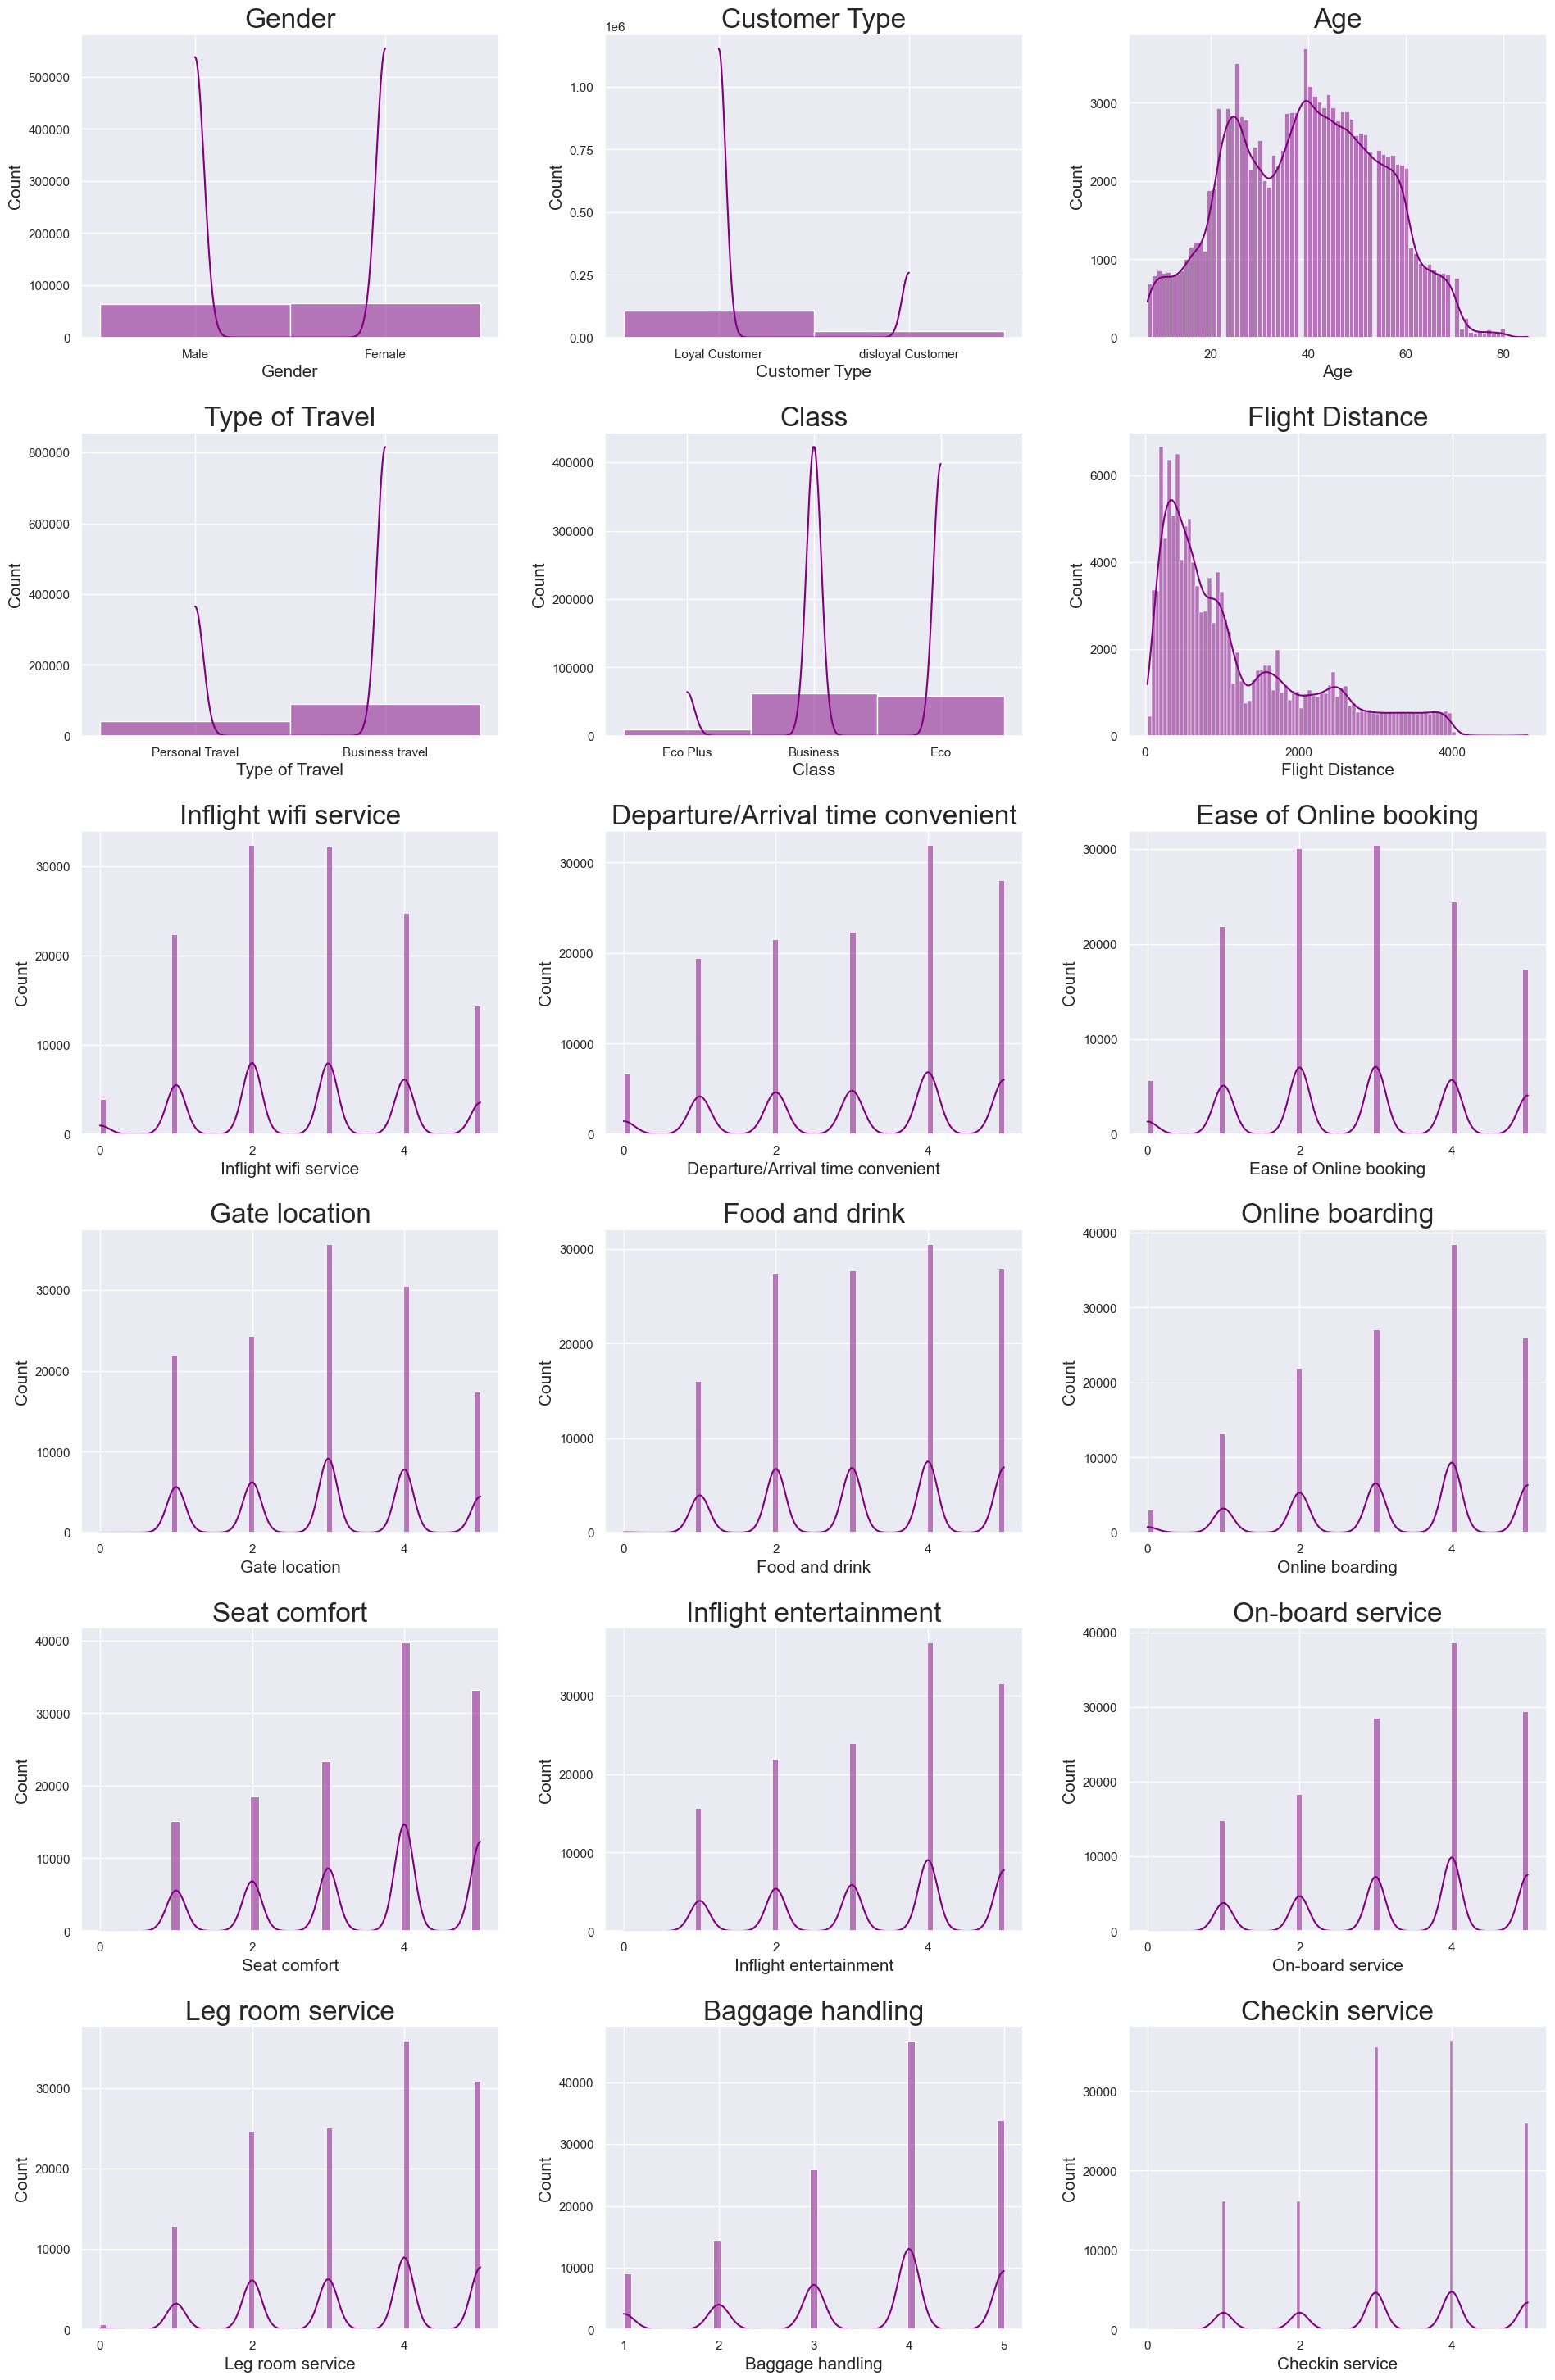

In [49]:
sns.set(rc={
            "font.size":15,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid")
fig, axs = plt.subplots(6, 3, figsize=(20,30))
fig.tight_layout(pad=4.0)

for f,ax in zip(df,axs.ravel()):
    sns.set(font_scale = 2)
    ax=sns.histplot(ax=ax,data=df,x=df[f],kde=True,color='purple')
    ax.set_title(f)

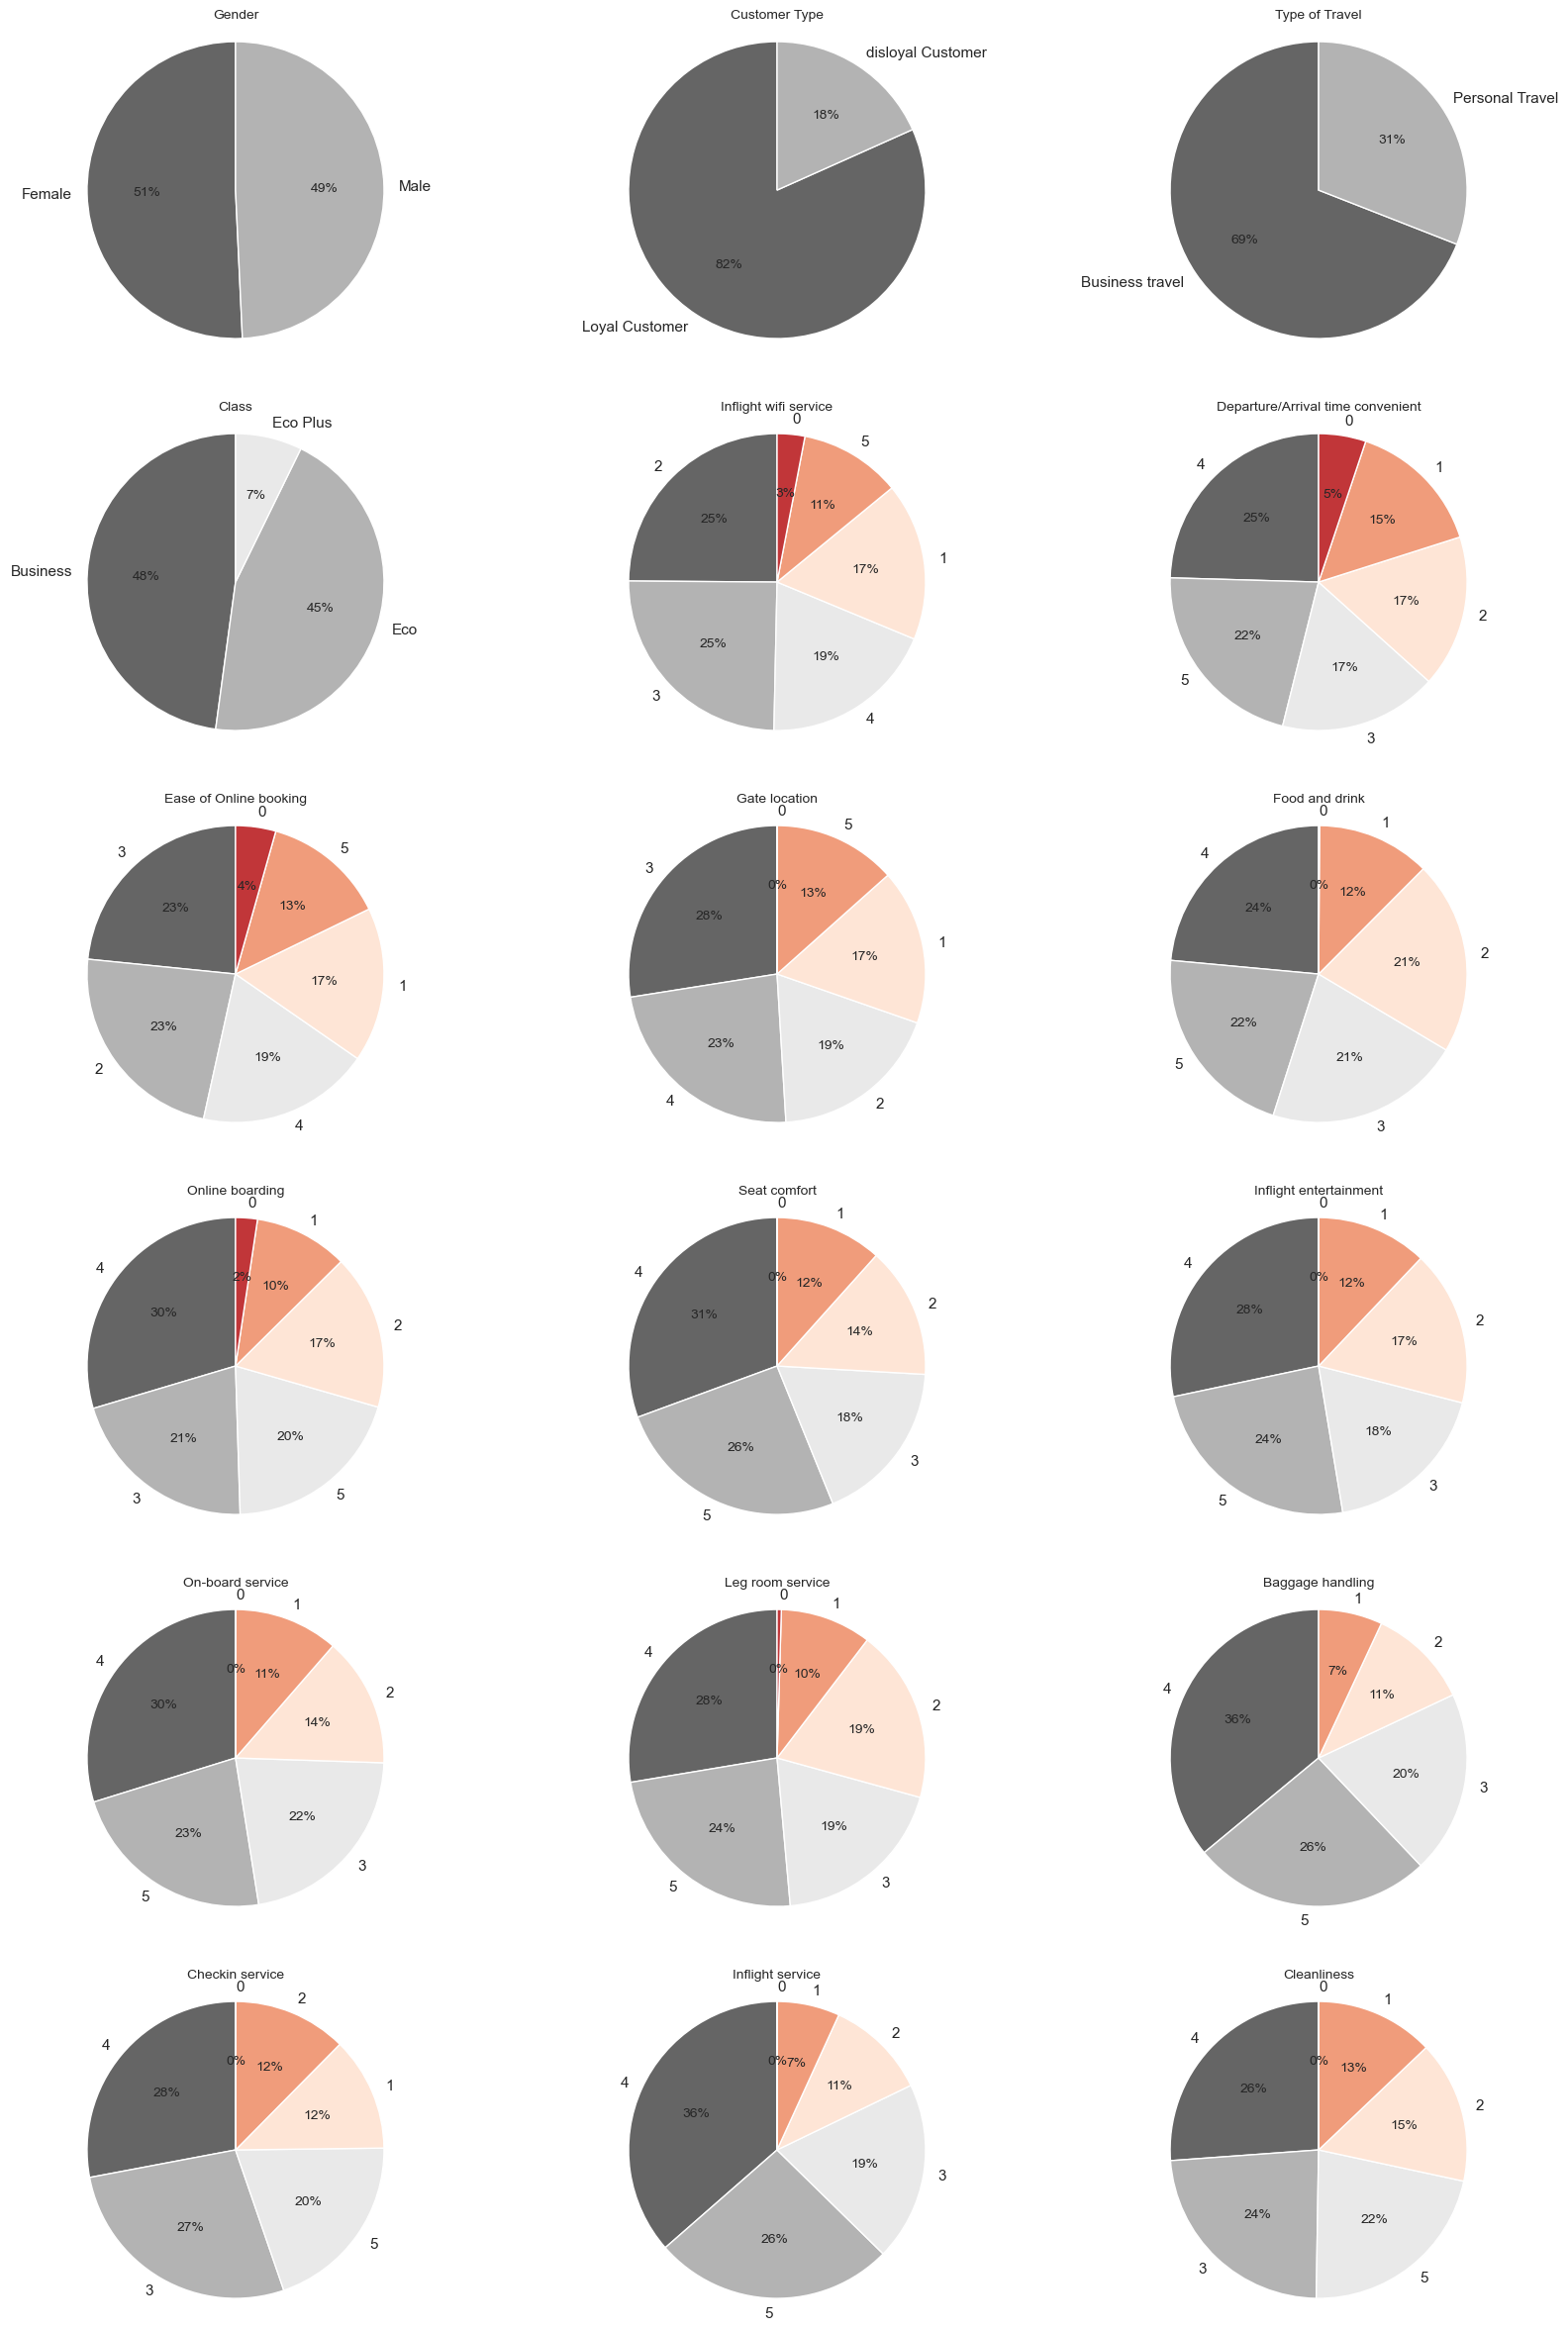

In [50]:
new_df=df.copy()
new_df.drop(['Age','Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes','satisfaction'], axis=1, inplace=True)
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":13},
             style="darkgrid")
fig, axes = plt.subplots(6, 3, figsize = (20, 30))
for i, col in enumerate(new_df):
    column_values = new_df[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//3, i%3].pie(sizes,labels = labels, colors = sns.color_palette("RdGy_r"),autopct = '%1.0f%%', startangle = 90)
    axes[i//3, i%3].axis('equal')
    axes[i//3, i%3].set_title(col)
plt.show()

#### Observations:
1.The number of men and women in this sample is approximately the same

2.The vast majority of the airline's customers are repeat customers

3.Most of our clients flew for business rather than personal reasons

4.About half of the passengers were in business class

5.More than 60% of passengers were satisfied with the luggage transportation service (rated 4-5 out of 5)

6.More than 50% of passengers were comfortable sitting in their seats (rated 4-5 out of 5)

In [51]:
df["satisfaction"].value_counts()

satisfaction
neutral or dissatisfied    73452
satisfied                  56428
Name: count, dtype: int64

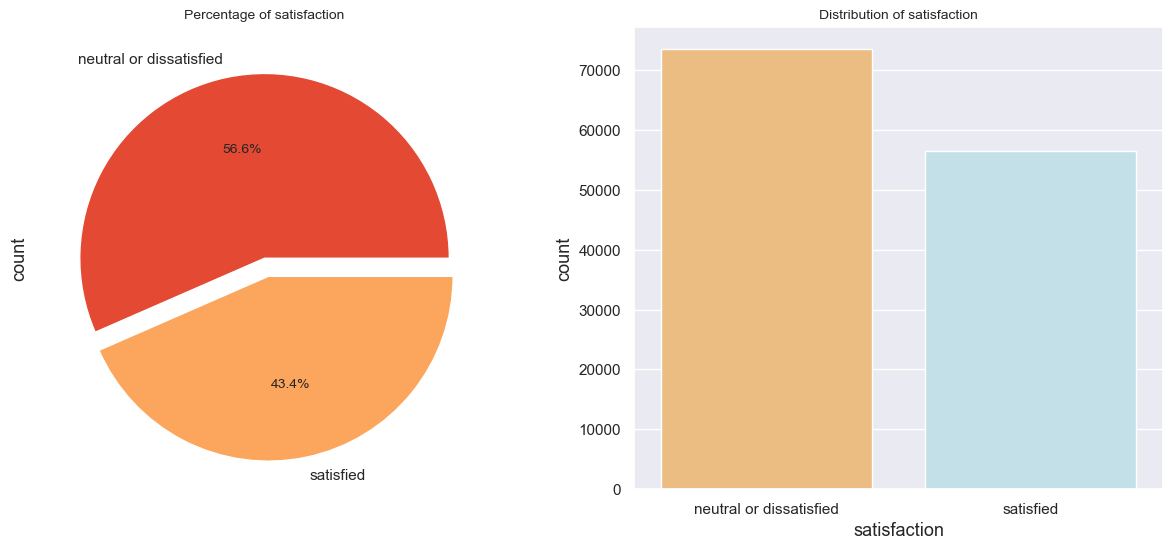

In [52]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
df['satisfaction'].value_counts().plot.pie(explode=[0,0.1],colors = sns.color_palette("RdYlBu"),autopct='%1.1f%%',ax=ax1)
ax1.set_title('Percentage of satisfaction')
sns.countplot(x='satisfaction',data=df,ax=ax2,palette='RdYlBu')
ax2.set_title('Distribution of satisfaction')
plt.show();

Observations

- As per the given data 56.7% people are dissatisfied and neutral and 43.3% people are satisfied.
- To analyse and visualise the data lets divide data columns into categorical and numerical columns.

In [60]:
# numerical and categoriacl columns(features)
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes('object').columns.tolist()

In [61]:
# numerical features
print("Total numeric columns are:", len(numeric_cols))
print(numeric_cols)

Total numeric columns are: 18
['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


In [62]:
# categorical features
print("Total categorical columns are:", len(categorical_cols))
print(categorical_cols)

Total categorical columns are: 5
['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']


In [63]:
categorical_cols.remove("satisfaction")

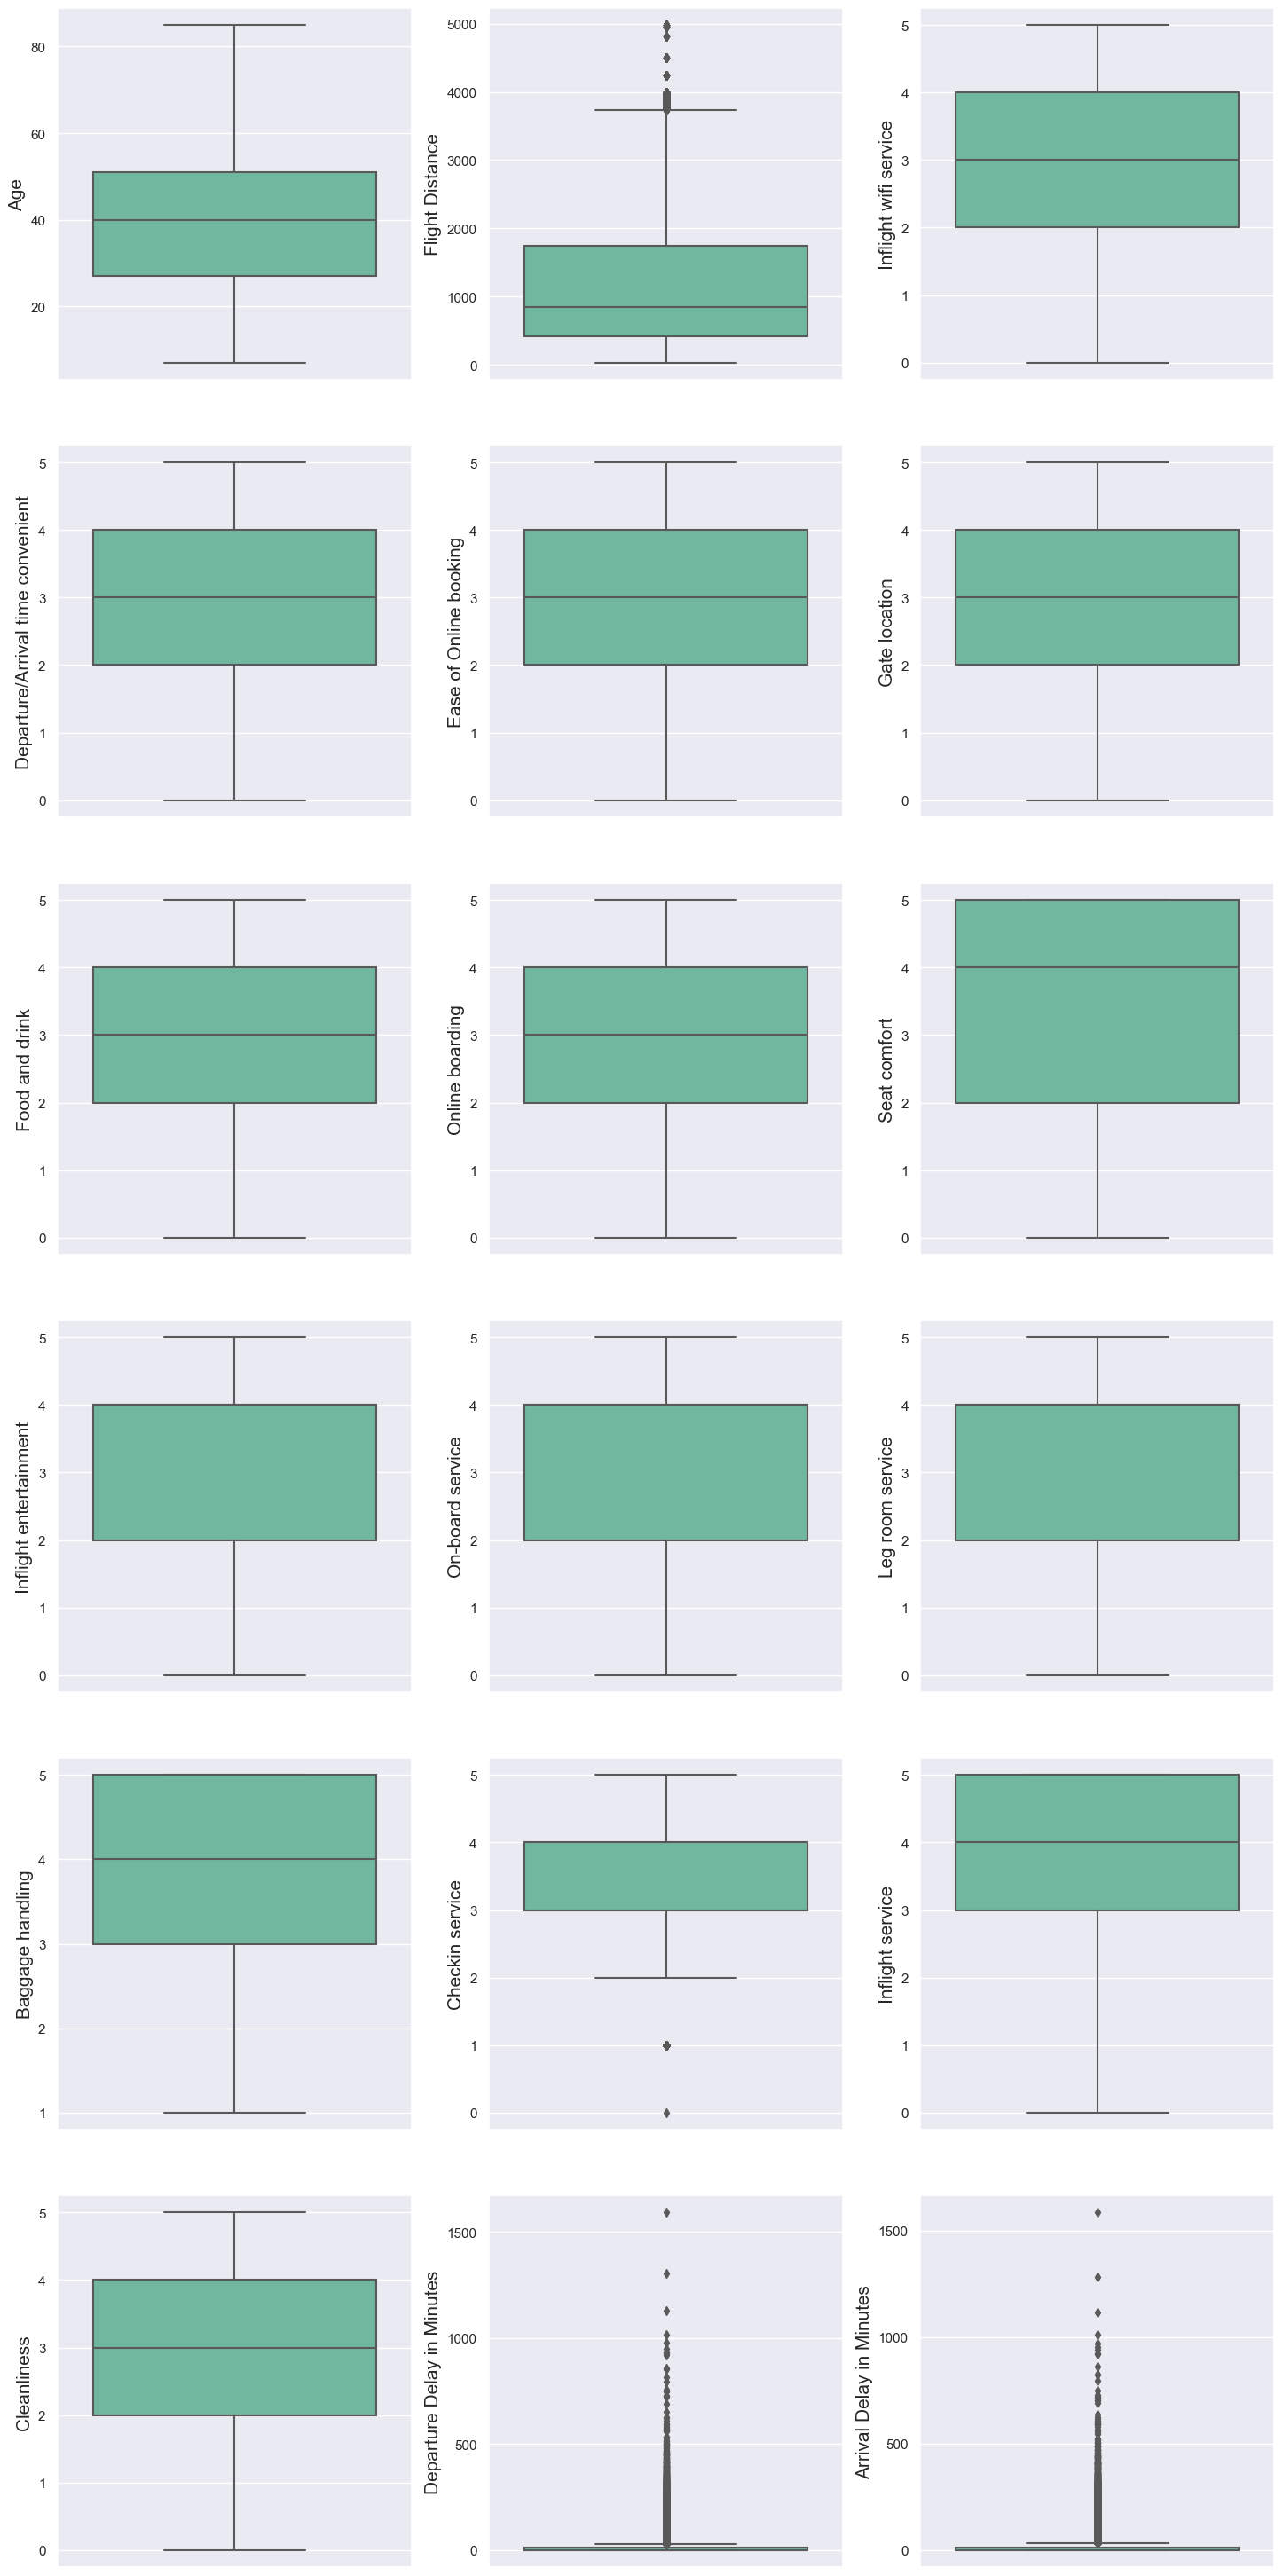

In [66]:
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid",
            )

fig, axs = plt.subplots(6, 3, figsize=(15,30))
fig.tight_layout(pad=3.0)

for f,ax in zip(numeric_cols,axs.ravel()):
    sns.set(font_scale = 2)
    ax=sns.boxplot(ax=ax,data=df,y=df[f],palette='BuGn')

* Flight distance, checkin service, Departure Delay in Minutes, Arrival Delay in Minutes has some outlies only

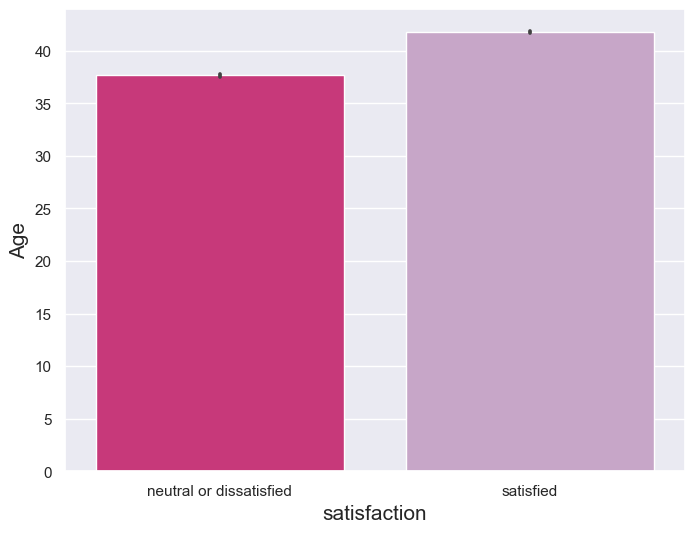

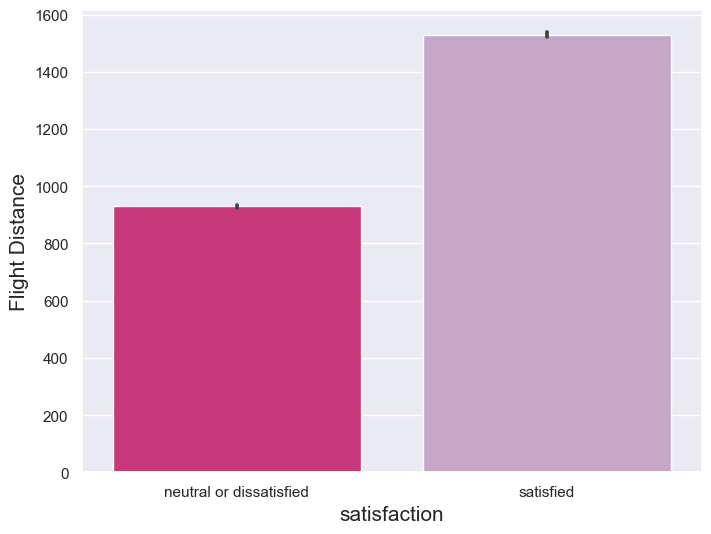

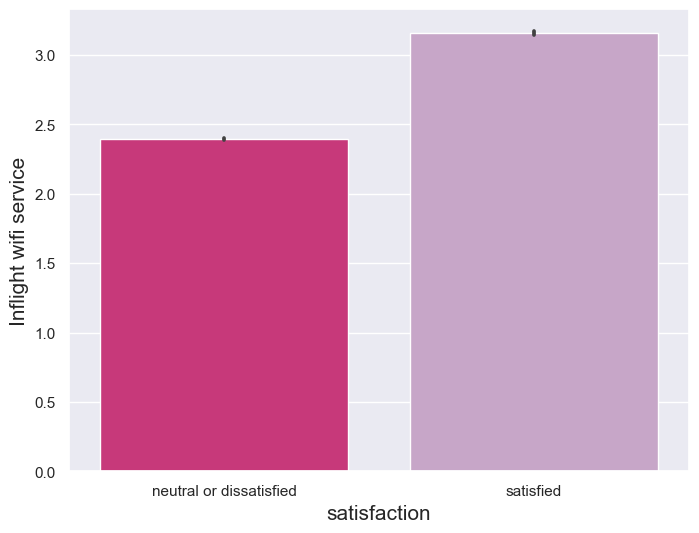

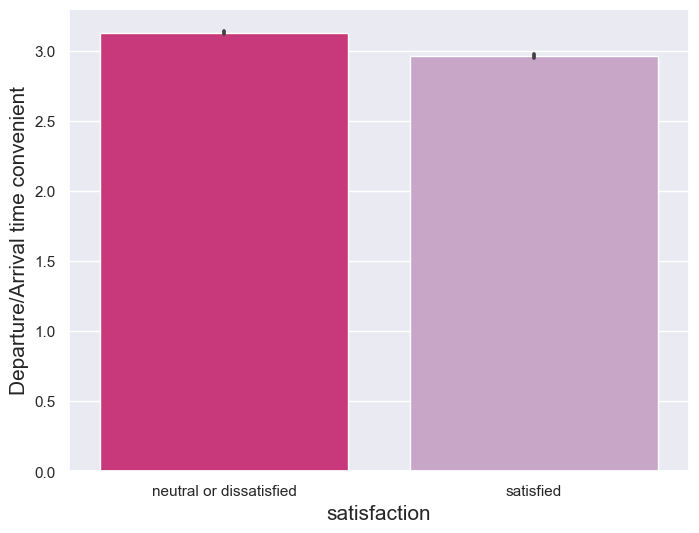

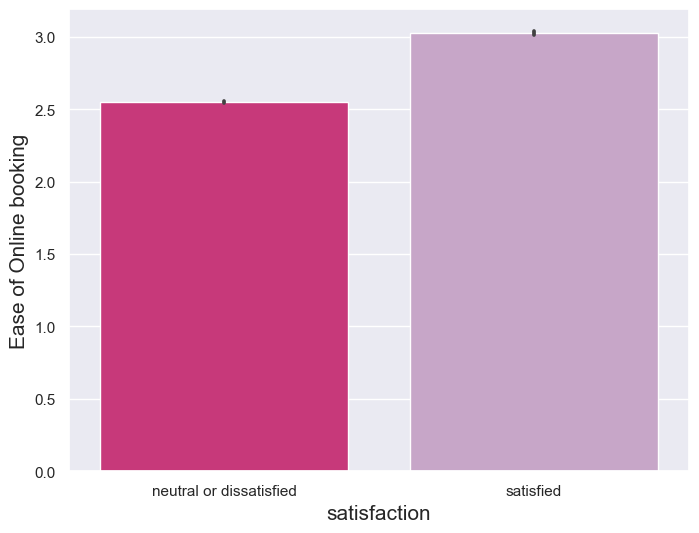

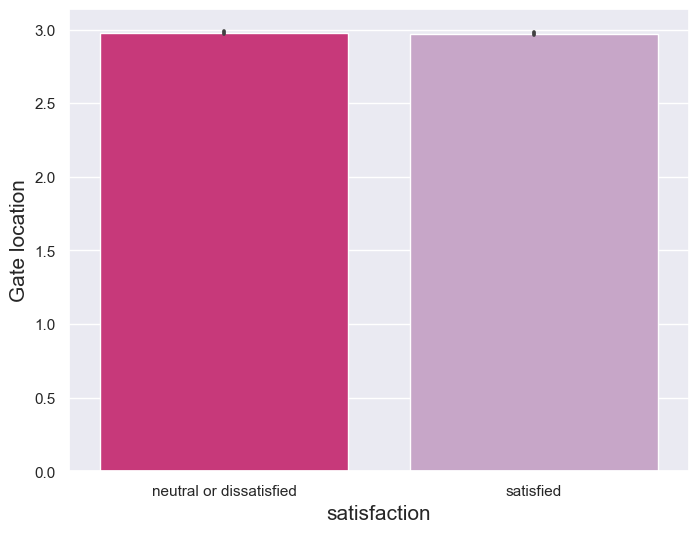

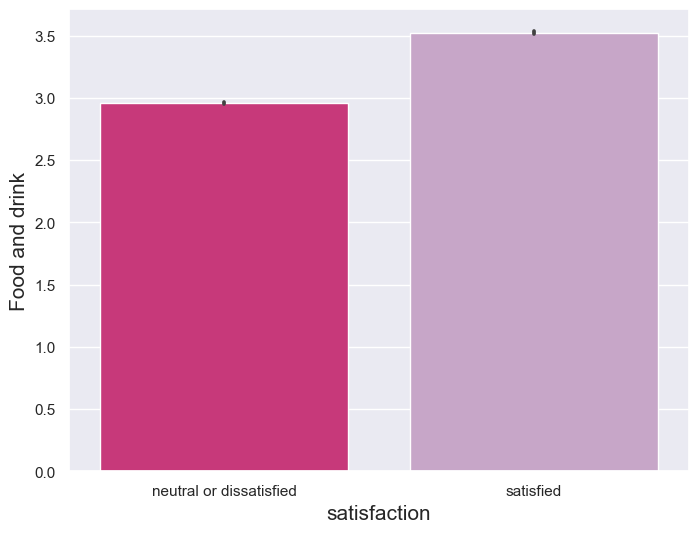

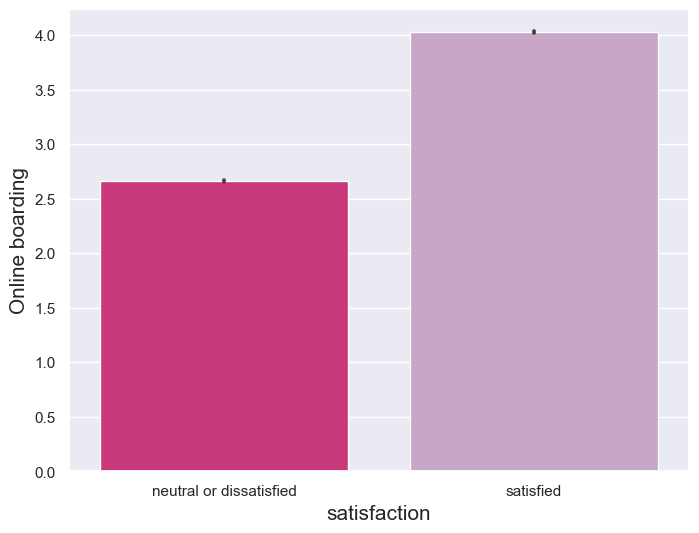

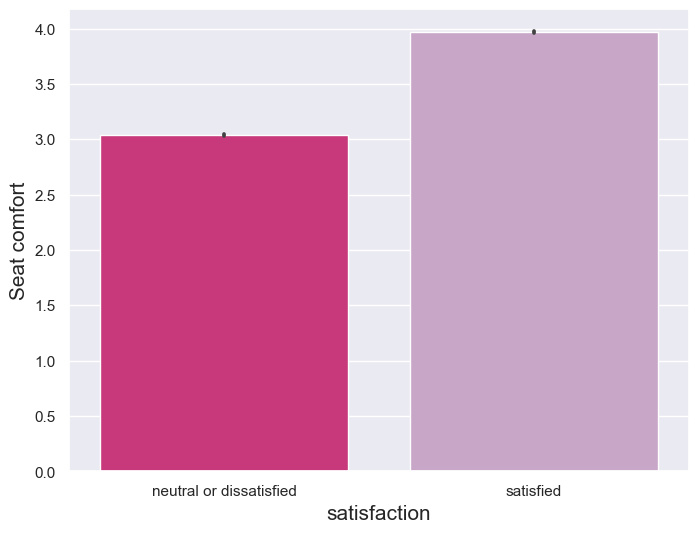

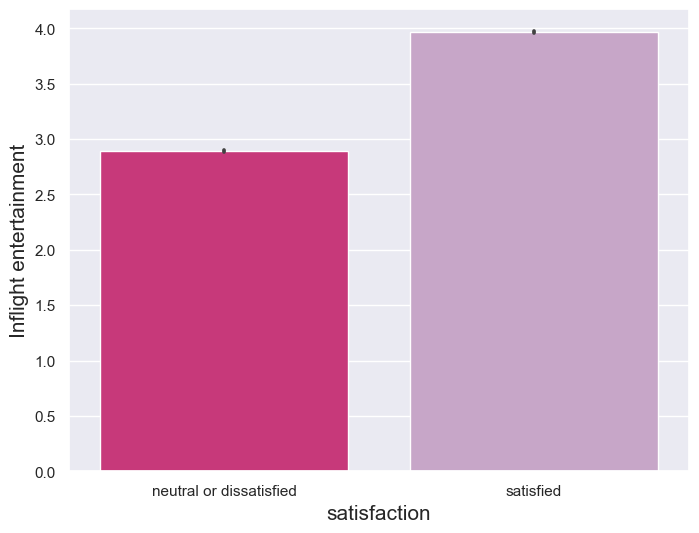

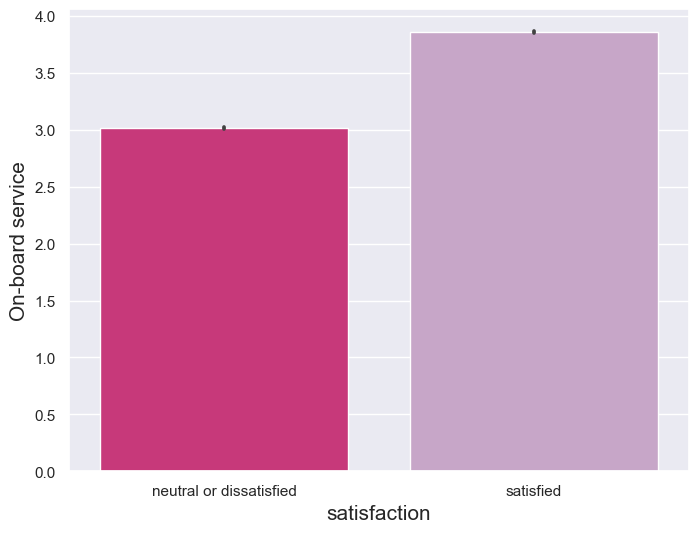

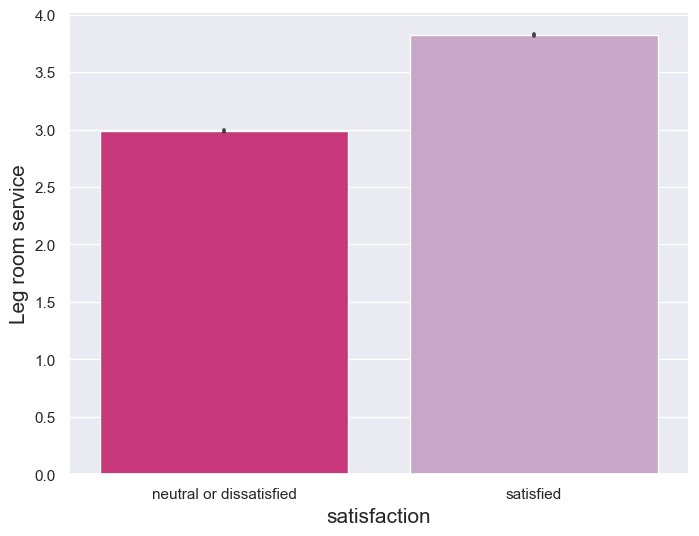

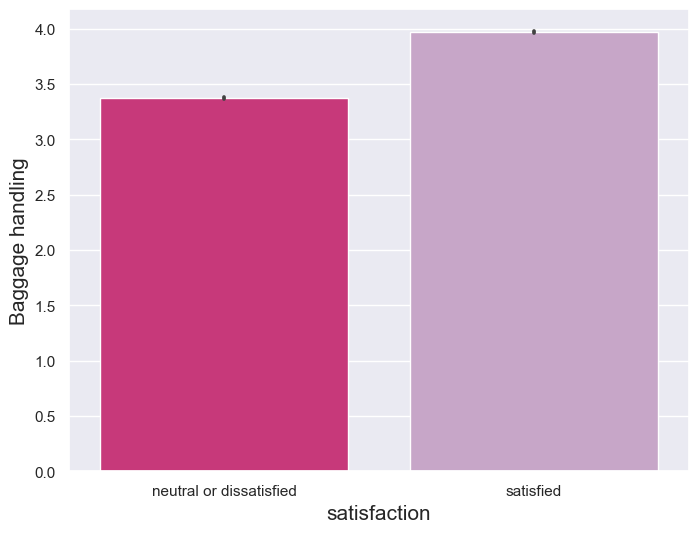

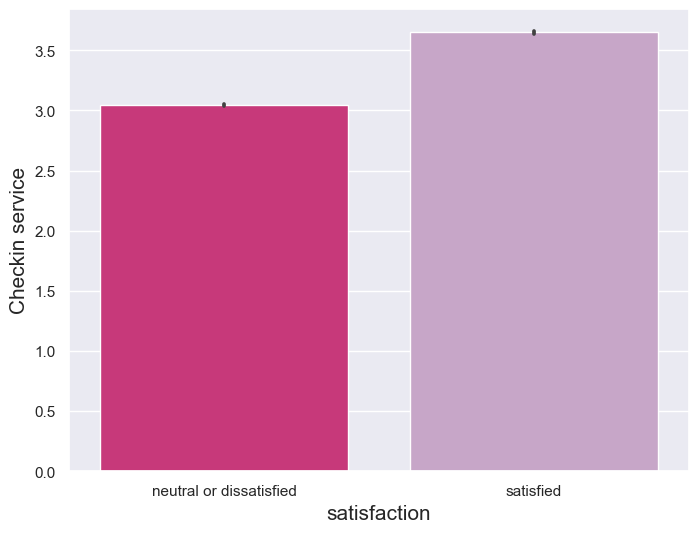

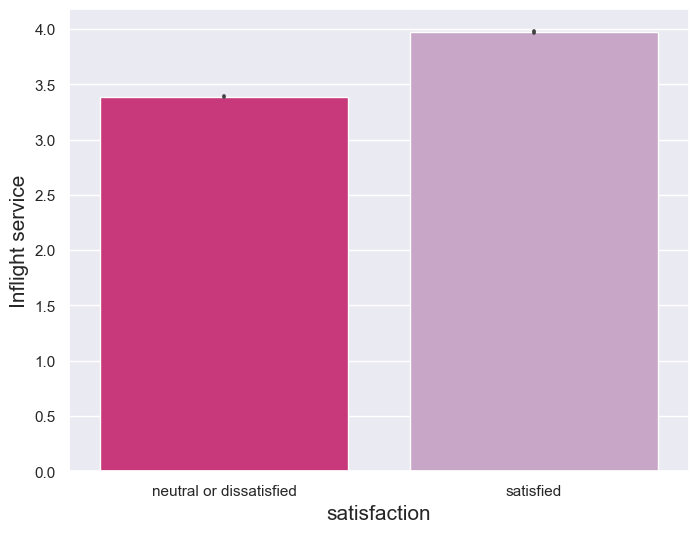

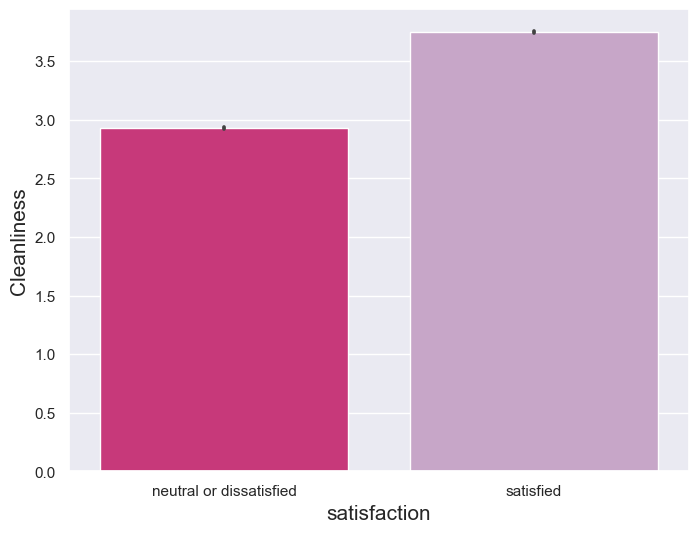

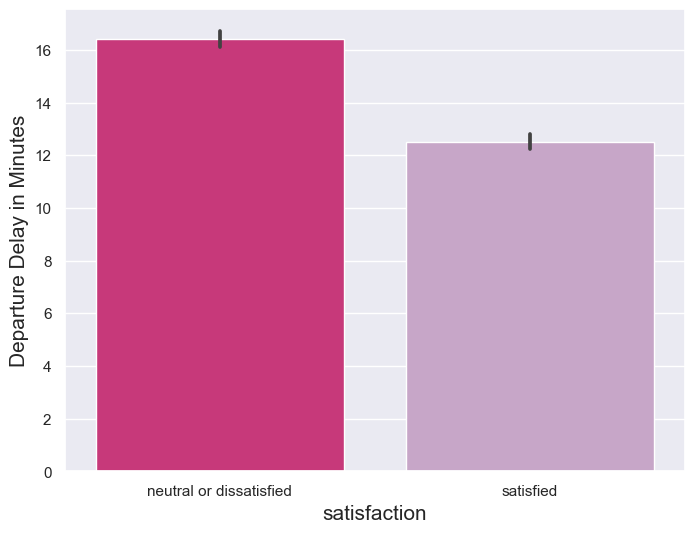

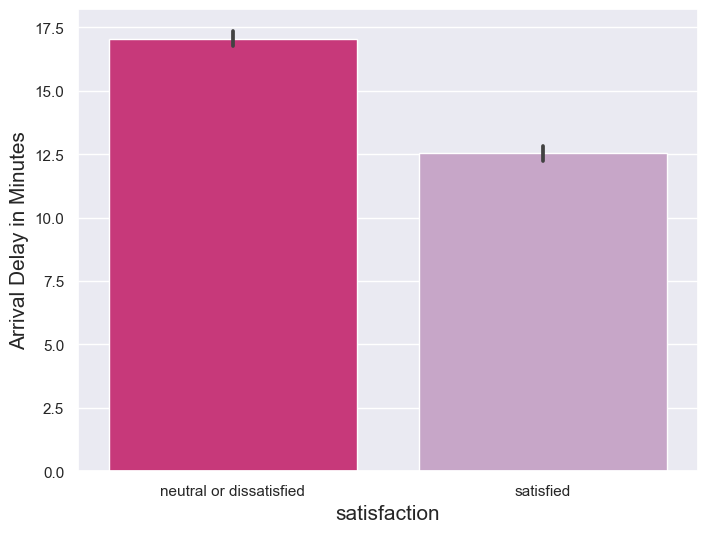

In [67]:
sns.set(rc={'figure.figsize':(8,6),
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid")
for i in numeric_cols:
    sns.barplot(data=df,x='satisfaction',y=i,palette='PuRd_r')
    plt.show()

* From above graphs,it is clear that the age and Gate location, does not play a huge role in flight satisfaction.
* And also the gender does not tell us much as seen in the earlier plot. Hence we can drop these values drop these values

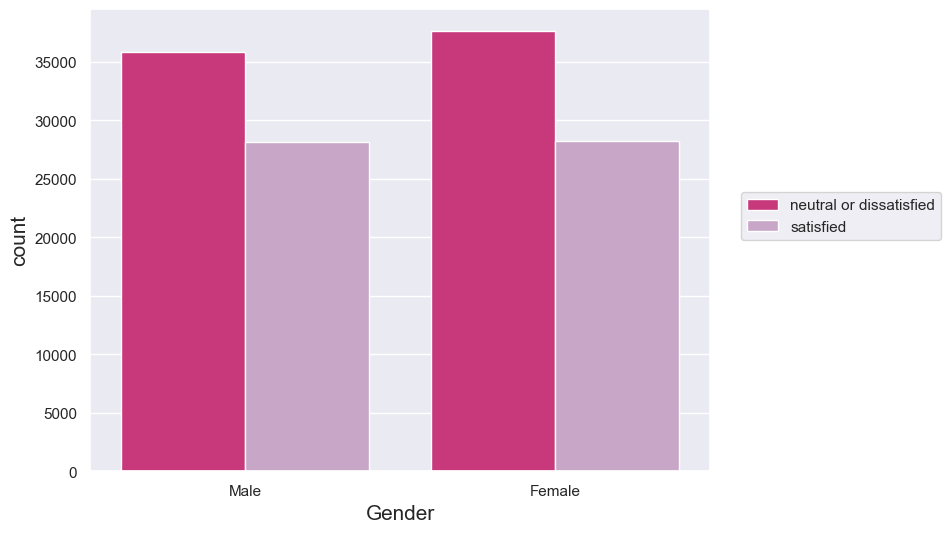

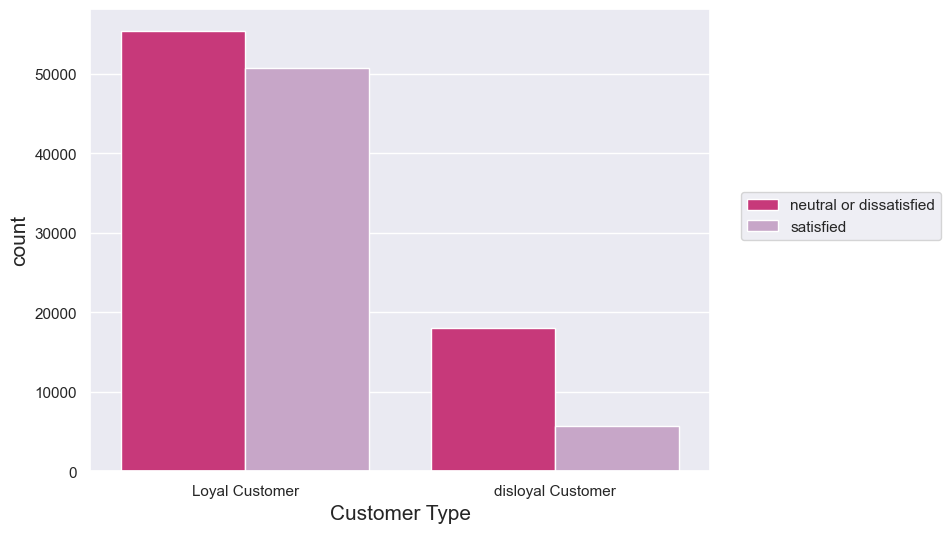

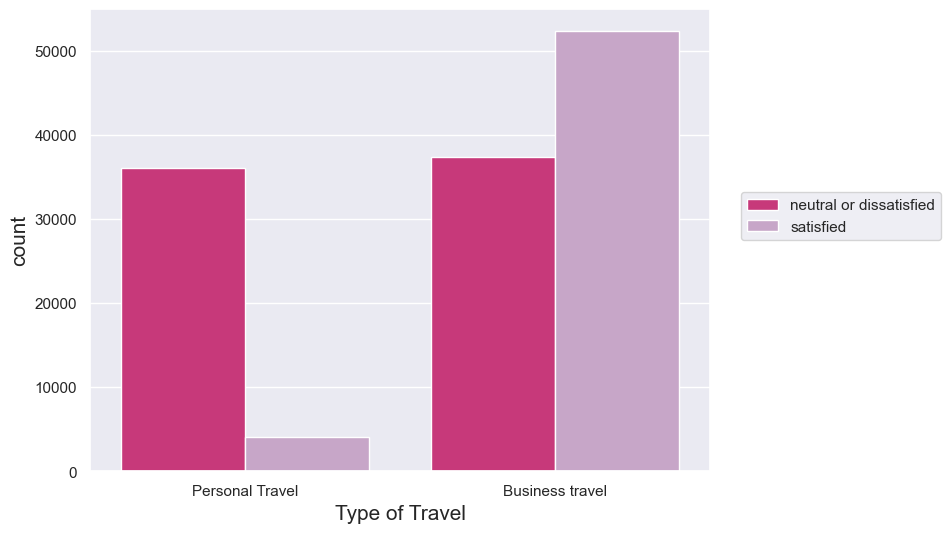

In [68]:
sns.set(rc={'figure.figsize':(11.7,8.27),
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid",
            )

for col in categorical_cols[:-1]:
    plt.figure(figsize=(8,6)) 
    sns.countplot(data=df,x=col,hue ='satisfaction',palette='PuRd_r')
    plt.legend(loc=(1.05,0.5))

* Gender doesn't play an important role in the satisfaction, as men and women seems to equally concerned about the same factors

* Number of loyal customers for this airline is high, however, the dissatisfaction level is high irrespective of the loyalty. Airline will have to work on maintaining the loyal customers

* Business Travellers seems to be more satisfied with the flight, than the personal travellers

* People in business class seems to be the most satisfied lot, and those in economy class are least satisfied

In [69]:
df.groupby('satisfaction')['Arrival Delay in Minutes'].mean()

satisfaction
neutral or dissatisfied    17.055992
satisfied                  12.533859
Name: Arrival Delay in Minutes, dtype: float64

<Axes: xlabel='Arrival Delay in Minutes', ylabel='Departure Delay in Minutes'>

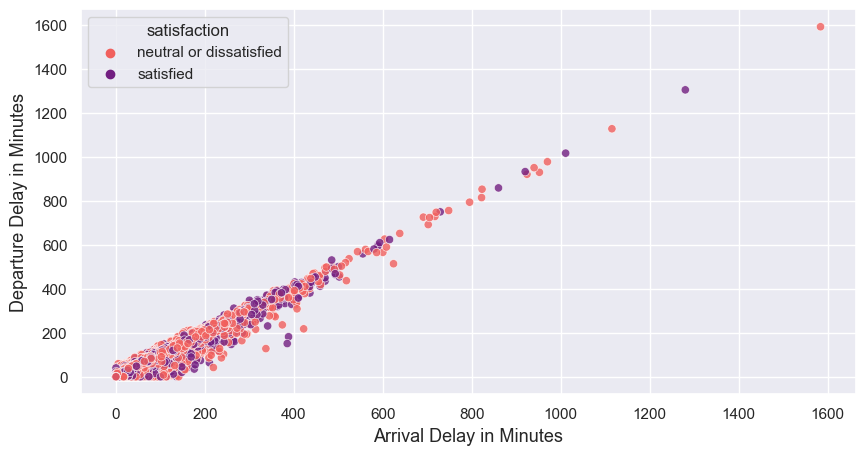

In [70]:
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":13},
             style="darkgrid")
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data=df,x='Arrival Delay in Minutes',y='Departure Delay in Minutes',hue='satisfaction',palette='magma_r', alpha=0.8)

* The arrival and departure delay seems to have a linear relationship, which makes complete sense! And well, there is 1 customer who was satisfied even after a delay of 1300 minutes!!

(0.0, 1000.0)

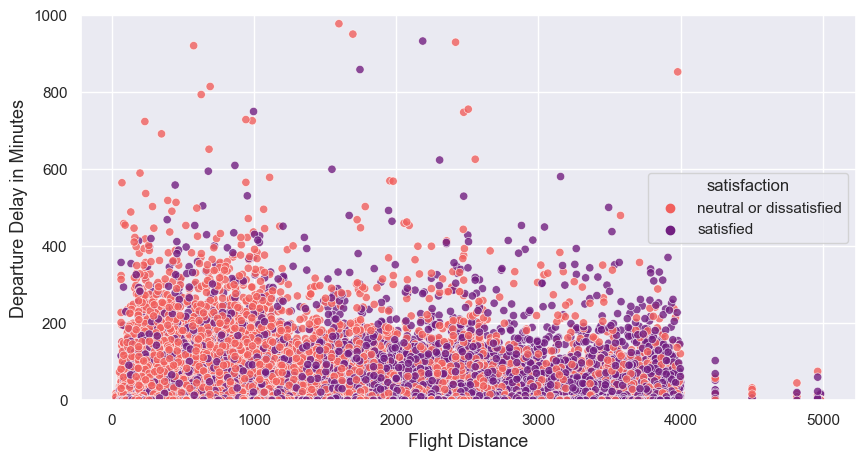

In [71]:
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":13},
             style="darkgrid")
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data=df,x='Flight Distance',y='Departure Delay in Minutes',hue='satisfaction',palette='magma_r', alpha=0.8)
plt.ylim(0,1000)

* The most important takeaway here is the longer the flight distance, most passengers are okay with a slight delay in departure, which is a strange finding from this plot!
* So departure delay is less of a factor for a long distance flight, comparitively, however, short distance travellers does not seem to be excited about the departure delays, which also makes sense

<Axes: xlabel='Age', ylabel='Count'>

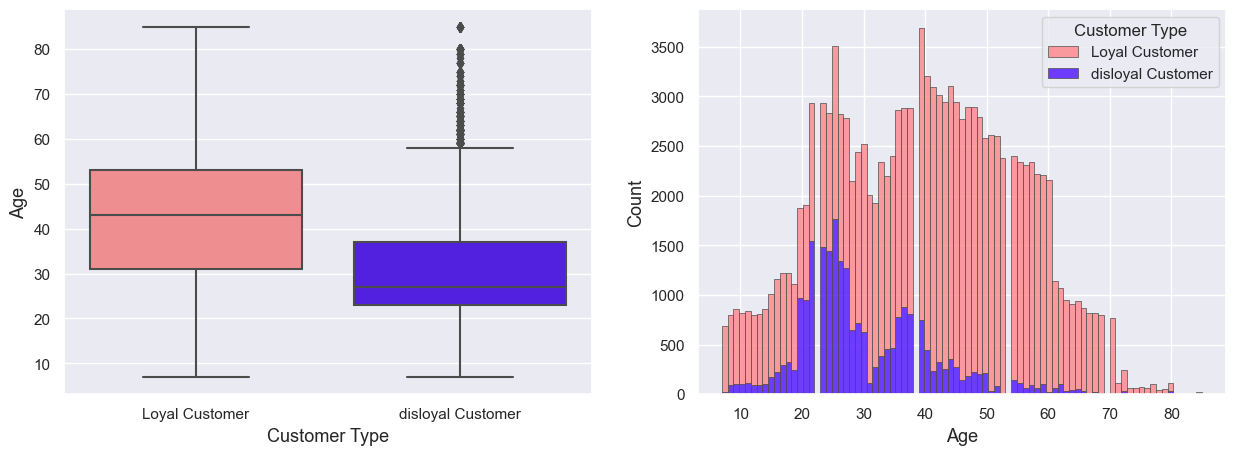

In [73]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Customer Type", y = "Age", palette = "gnuplot2_r", data = df, ax = ax[0])
sns.histplot(df, x = "Age", hue = "Customer Type", multiple = "stack", palette = "gnuplot2_r", edgecolor = ".3", linewidth = .5, ax = ax[1])

* From above we can conclude that most of the airline's regular customers are between the ages of 30 and 50 (their average age is slightly over 40).
* The age range of non-regular customers is slightly smaller (from 25 to 40 years old, on average - a little less than 30).

<Axes: xlabel='Age', ylabel='Count'>

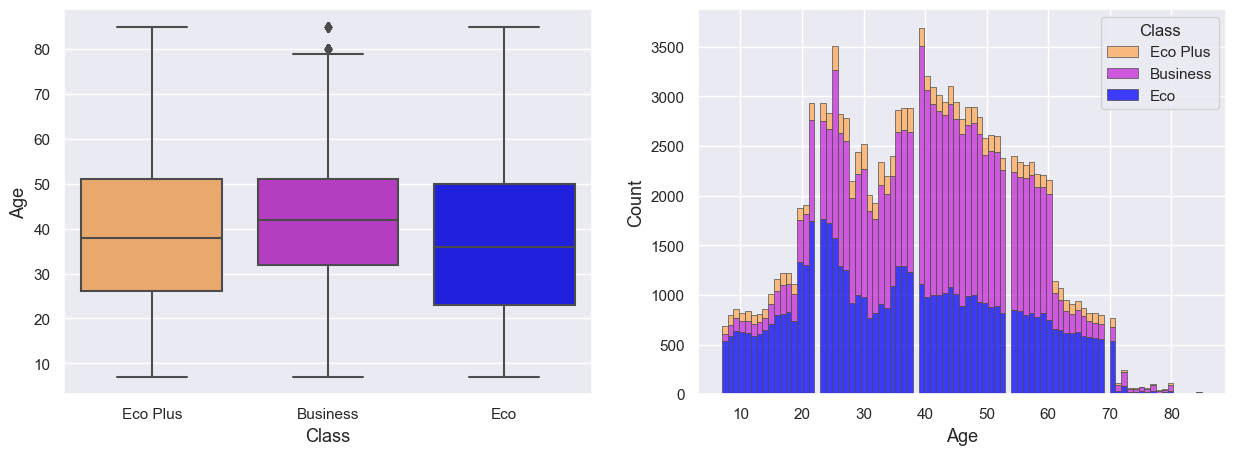

In [74]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Age", palette = "gnuplot2_r", data = df, ax = ax[0])
sns.histplot(df, x = "Age", hue = "Class", multiple = "stack", palette = "gnuplot2_r", edgecolor = ".3", linewidth = .5, ax = ax[1])

It can be seen that, on average, the age range of those customers who travel in business class is the same (according to the previous box chart) as the age range of regular customers. Based on this observation, it can be assumed that regular customers mainly buy business class for themselves.

<Axes: xlabel='Flight Distance', ylabel='Count'>

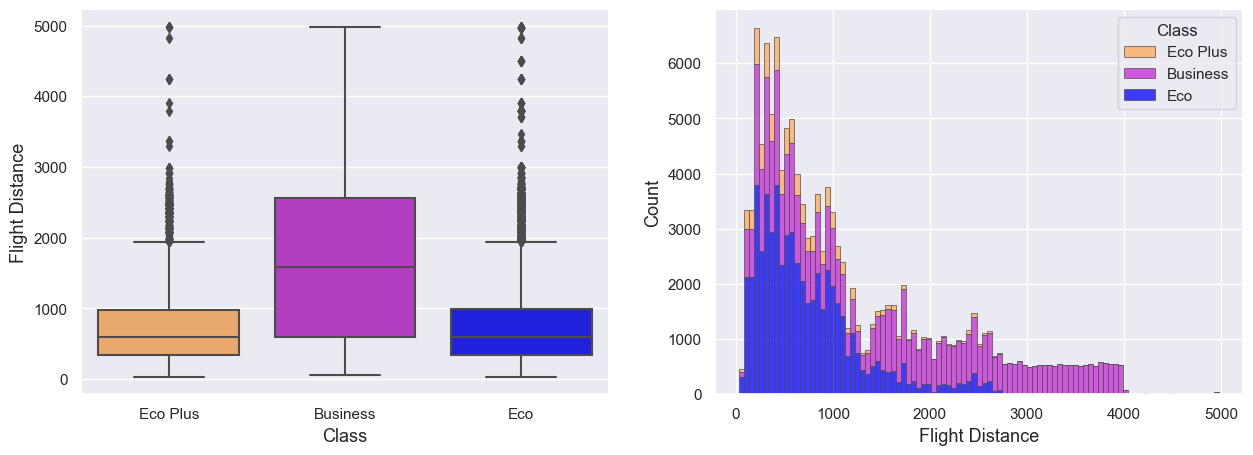

In [75]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Flight Distance", palette = "gnuplot2_r", data = df, ax = ax[0])
sns.histplot(df, x = "Flight Distance", hue = "Class", multiple = "stack", palette = "gnuplot2_r", edgecolor = ".3", linewidth = .5, ax = ax[1])

* customers whose flight distance is long, mostly fly in business class.

<Axes: xlabel='Flight Distance', ylabel='Count'>

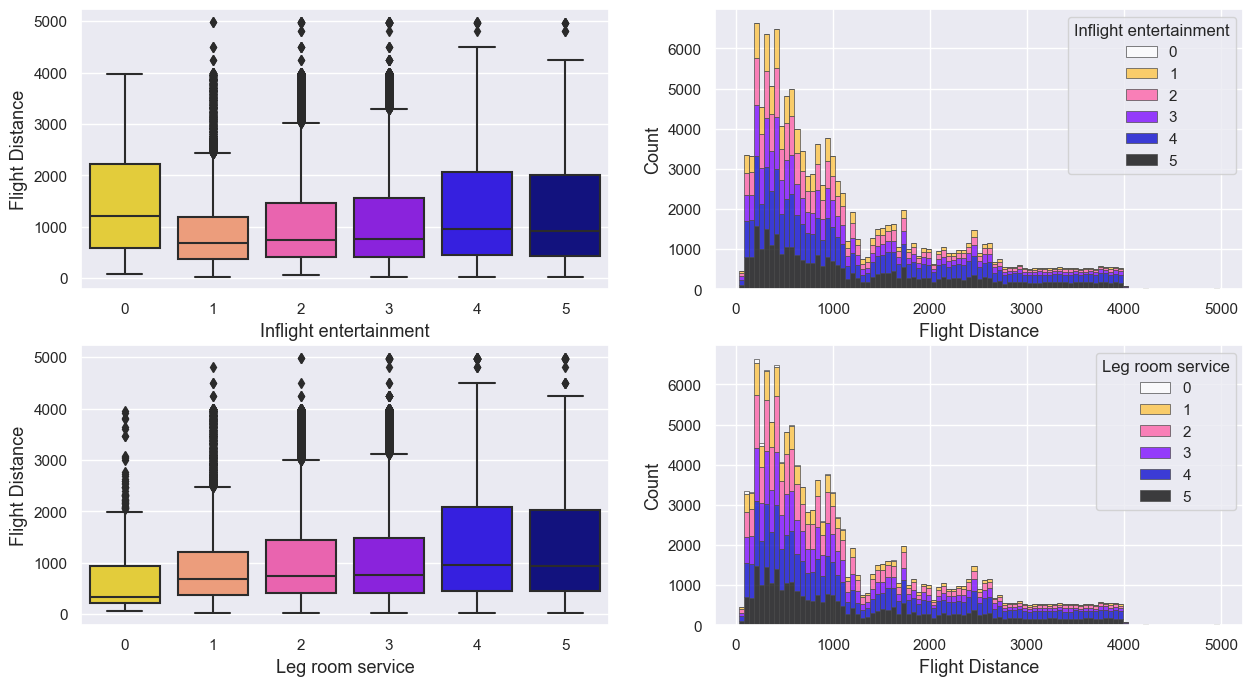

In [76]:
f, ax = plt.subplots(2, 2, figsize = (15,8))
sns.boxplot(x = "Inflight entertainment", y = "Flight Distance", palette = "gnuplot2_r", data = df, ax = ax[0, 0])
sns.histplot(df, x = "Flight Distance", hue = "Inflight entertainment", multiple = "stack", palette = "gnuplot2_r", edgecolor = ".3", linewidth = .5, ax = ax[0, 1])
sns.boxplot(x = "Leg room service", y = "Flight Distance", palette = "gnuplot2_r", data = df, ax = ax[1, 0])
sns.histplot(df, x = "Flight Distance", hue = "Leg room service", multiple = "stack", palette = "gnuplot2_r", edgecolor = ".3", linewidth = .5, ax = ax[1, 1])

* The more distance an aircraft passenger travels (respectively, the longer they are in flight)
* The more they are satisfied with the entertainment in flight and the extra legroom (on average).

In [77]:
# step1: Independent features and dependent features
input_cols = list(df.iloc[:,:-1])# independent features
target_col="satisfaction" # dependent feature 

In [78]:
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [79]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(77928, 23)
(25976, 23)
(25976, 23)


lets take copy of the datasets, so that there will not be further changes in the orignal dataset

In [85]:
# copy of training dataset 
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

# copy of valdation dataset

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

# copy of test dataset

test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [86]:
# Impute missing numerical values
imputer = SimpleImputer(strategy = 'median').fit(train_df[numeric_cols])
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [87]:
train_inputs[numeric_cols].isna().sum()

Age                                  0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [89]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(train_df[numeric_cols])
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [90]:
train_inputs[numeric_cols].describe()

Age  Flight Distance  Inflight wifi service  \
count  77928.000000     77928.000000           77928.000000   
mean       0.415536         0.234492               0.545919   
std        0.194039         0.201545               0.266188   
min        0.000000         0.000000               0.000000   
25%        0.256410         0.077342               0.400000   
50%        0.423077         0.164580               0.600000   
75%        0.564103         0.345921               0.800000   
max        1.000000         1.000000               1.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                       77928.000000            77928.000000   
mean                            0.612986                0.552076   
std                             0.305278                0.280792   
min                             0.000000                0.000000   
25%                             0.400000                0.400000   
50%                             0.600000                0.600000   
75%                             0.800000                0.800000   
max                             1.000000                1.000000   

       Gate location  Food and drink  Online boarding  Seat comfort  \
count   77928.000000    77928.000000     77928.000000  77928.000000   
mean        0.596800        0.641274         0.650018      0.688358   
std         0.255079        0.265716         0.270556      0.263474   
min         0.000000        0.000000         0.000000      0.000000   
25%         0.400000        0.400000         0.400000      0.400000   
50%         0.600000        0.600000         0.600000      0.800000   
75%         0.800000        0.800000         0.800000      1.000000   
max         1.000000        1.000000         1.000000      1.000000   

       Inflight entertainment  On-board service  Leg room service  \
count            77928.000000      77928.000000      77928.000000   
mean                 0.672179          0.676663          0.670427   
std                  0.266481          0.257407          0.263198   
min                  0.000000          0.000000          0.000000   
25%                  0.400000          0.400000          0.400000   
50%                  0.800000          0.800000          0.800000   
75%                  0.800000          0.800000          0.800000   
max                  1.000000          1.000000          1.000000   

       Baggage handling  Checkin service  Inflight service   Cleanliness  \
count      77928.000000     77928.000000      77928.000000  77928.000000   
mean           0.658111         0.661115          0.729027      0.657800   
std            0.294597         0.253028          0.235060      0.262241   
min            0.000000         0.000000          0.000000      0.000000   
25%            0.500000         0.600000          0.600000      0.400000   
50%            0.750000         0.600000          0.800000      0.600000   
75%            1.000000         0.800000          1.000000      0.800000   
max            1.000000         1.000000          1.000000      1.000000   

       Departure Delay in Minutes  Arrival Delay in Minutes  
count                77928.000000              77928.000000  
mean                     0.011187                  0.011672  
std                      0.028688                  0.029544  
min                      0.000000                  0.000000  
25%                      0.000000                  0.000000  
50%                      0.000000                  0.000000  
75%                      0.009195                  0.010156  
max                      1.000000                  1.000000

In [92]:
# One-hot encode categorical features
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(train_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [94]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['Gender_Female', 'Gender_Male', 'Customer Type_Loyal Customer', 'Customer Type_disloyal Customer', 'Type of Travel_Business travel', 'Type of Travel_Personal Travel', 'Class_Business', 'Class_Eco', 'Class_Eco Plus']


In [95]:
pd.set_option('display.max_columns', None)

In [96]:
test_inputs

Gender   Customer Type       Age   Type of Travel     Class  \
103044    Male  Loyal Customer  0.756410  Personal Travel       Eco   
43282   Female  Loyal Customer  0.397436  Business travel  Business   
65543   Female  Loyal Customer  0.397436  Business travel       Eco   
65083   Female  Loyal Customer  0.320513  Personal Travel       Eco   
76496     Male  Loyal Customer  0.333333  Business travel  Business   
...        ...             ...       ...              ...       ...   
17335   Female  Loyal Customer  0.474359  Personal Travel       Eco   
6010    Female  Loyal Customer  0.589744  Business travel  Business   
101127    Male  Loyal Customer  0.269231  Business travel  Eco Plus   
82323     Male  Loyal Customer  0.294872  Business travel  Business   
61871   Female  Loyal Customer  0.666667  Personal Travel       Eco   

        Flight Distance  Inflight wifi service  \
103044         0.332593                    0.6   
43282          0.186389                    0.4   
65543          0.031906                    0.4   
65083          0.029079                    0.4   
76496          0.395598                    1.0   
...                 ...                    ...   
17335          0.047052                    0.8   
6010           0.447698                    1.0   
101127         0.092488                    0.8   
82323          0.084208                    0.4   
61871          0.341276                    0.6   

        Departure/Arrival time convenient  Ease of Online booking  \
103044                                0.4                     0.6   
43282                                 0.4                     0.4   
65543                                 0.2                     0.2   
65083                                 1.0                     0.4   
76496                                 1.0                     1.0   
...                                   ...                     ...   
17335                                 0.2                     0.8   
6010                                  1.0                     1.0   
101127                                1.0                     1.0   
82323                                 0.4                     0.4   
61871                                 0.6                     0.6   

        Gate location  Food and drink  Online boarding  Seat comfort  \
103044            0.4             0.8              0.6           0.8   
43282             0.4             0.4              0.6           0.2   
65543             0.2             0.4              0.4           0.4   
65083             0.2             0.2              0.4           0.2   
76496             1.0             0.8              0.8           0.8   
...               ...             ...              ...           ...   
17335             0.4             0.4              0.4           0.4   
6010              1.0             1.0              0.6           1.0   
101127            1.0             0.8              0.8           0.8   
82323             0.4             1.0              1.0           1.0   
61871             0.8             0.8              0.8           0.8   

        Inflight entertainment  On-board service  Leg room service  \
103044                     0.8               0.8               0.6   
43282                      0.8               0.8               0.8   
65543                      0.4               0.2               0.4   
65083                      0.2               0.6               1.0   
76496                      0.8               0.8               0.2   
...                        ...               ...               ...   
17335                      0.8               0.8               0.8   
6010                       1.0               1.0               1.0   
101127                     0.8               0.6               0.4   
82323                      1.0               0.8               0.8   
61871                      0.8               0.8               0.6   

        Baggage han

It can be useful to save processed data to disk, especially for really large datasets, to avoid repeating the preprocessing steps every time you start the Jupyter notebook. The parquet format is a fast and efficient format for saving and loading Pandas dataframes.

In [97]:
# check the shape of the data before saving data in parquet.
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (77928, 31)
train_targets: (77928,)
val_inputs: (25976, 31)
val_targets: (25976,)
test_inputs: (25976, 31)
test_targets: (25976,)


In [98]:
# Save processed data to disk
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')


# Load processed data from disk
train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')
train_targets = pd.read_parquet('train_targets.parquet')[target_col]
val_targets = pd.read_parquet('val_targets.parquet')[target_col]

In [99]:
# check the shape of the data after saving data in parquet.
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (77928, 31)
train_targets: (77928,)
val_inputs: (25976, 31)
val_targets: (25976,)
test_inputs: (25976, 31)
test_targets: (25976,)


In [100]:
train_df['satisfaction'] = train_df['satisfaction'].map({'neutral or dissatisfied':0 , 'satisfied':1})
val_df['satisfaction'] = val_df['satisfaction'].map({'neutral or dissatisfied':0 , 'satisfied':1})
test_df['satisfaction'] = test_df['satisfaction'].map({'neutral or dissatisfied':0 , 'satisfied':1})

In [101]:
# Select the columns to be used for training/prediction

# training dataset
X_train = train_inputs[numeric_cols + encoded_cols]
y_train = train_df["satisfaction"]

# validation dataset
X_val = val_inputs[numeric_cols + encoded_cols]
y_val=  val_df["satisfaction"]

# test dataset
X_test = test_inputs[numeric_cols + encoded_cols]
y_test= test_df["satisfaction"]

In [102]:
y_train.value_counts()

satisfaction
0    44072
1    33856
Name: count, dtype: int64

In [103]:
y_val.value_counts()

satisfaction
0    14758
1    11218
Name: count, dtype: int64

In [104]:
y_test.value_counts()

satisfaction
0    14622
1    11354
Name: count, dtype: int64

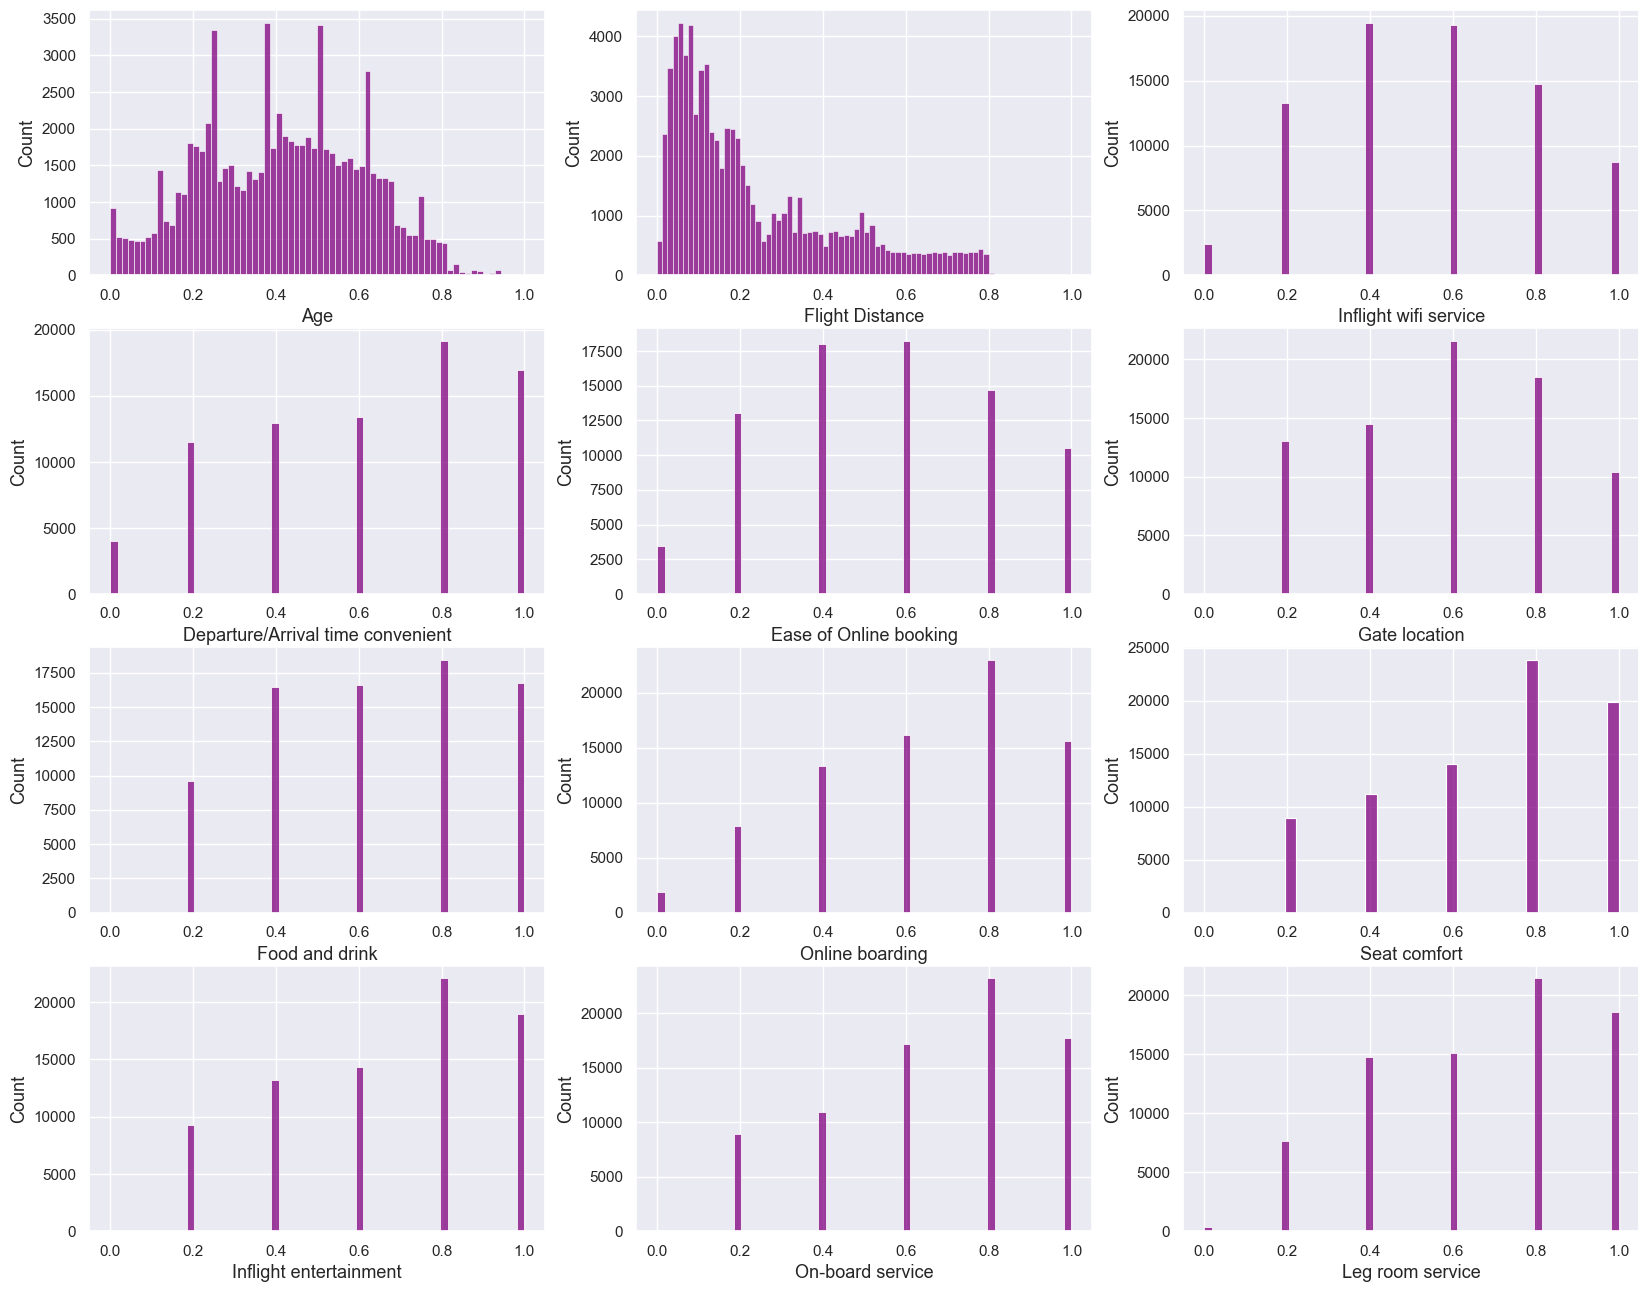

In [105]:
### Distribution after transformation 

columnList = list(X_train.columns)
columnList

fig = plt.figure(figsize=[20,20])
for col,i in zip(columnList,range(1,13)):
    axes = fig.add_subplot(5,3,i)
    sns.histplot(X_train[col],ax=axes, kde_kws={'bw':1.5}, color='purple')
plt.show();

#### Modelling

In [106]:
def plot_roc_curve(y_true,y_prob_preds,ax):
    """
    To plot the ROC curve for the given predictions and model

    """ 
    fpr,tpr,threshold = roc_curve(y_true,y_prob_preds)
    roc_auc = auc(fpr,tpr)
    ax.plot(fpr,tpr,"b",label="AUC = %0.2f" % roc_auc)
    ax.set_title("Receiver Operating Characteristic")
    ax.legend(loc='lower right')
    ax.plot([0,1],[0,1],'r--')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate");
    plt.show();

In [107]:
def plot_confustion_matrix(y_true,y_preds,axes,name=''):
    """
    To plot the Confusion Matrix for the given predictions

    """     
    cm = confusion_matrix(y_true, y_preds)
    group_names = ['TN','FP','FN','TP']
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues',ax=axes)
    axes.set_ylim([2,0])
    axes.set_xlabel('Prediction')
    axes.set_ylabel('Actual')
    axes.set_title(f'{name} Confusion Matrix');

In [108]:
def make_classification_report(model,inputs,targets,model_name=None,record=False):
    """
     To Generate the classification report with all the metrics of a given model with confusion matrix as well as ROC AUC curve.

    """
    ### Getting the model name from model object
    if model_name is None: 
        model_name = str(type(model)).split(".")[-1][0:-2]

    ### Making the predictions for the given model
    preds = model.predict(inputs)
    if model_name in ["LinearSVC"]:
      prob_preds = model.decision_function(inputs)
    else:
      prob_preds = model.predict_proba(inputs)[:,1]

    ### printing the ROC AUC score
    auc_score = roc_auc_score(targets,prob_preds)
    print("ROC AUC Score : {:.2f}%\n".format(auc_score * 100.0))
    

    ### Plotting the Confusion Matrix and ROC AUC Curve
    fig, axes = plt.subplots(1, 2, figsize=(18,6))
    plot_confustion_matrix(targets,preds,axes[0],model_name)
    plot_roc_curve(targets,prob_preds,axes[1])
   

In [110]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,accuracy_score,roc_auc_score

		LOGISTICREGRESSION MODEL

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.88      0.90      0.89     44072
              satisfaction       0.87      0.84      0.85     33856

                  accuracy                           0.87     77928
                 macro avg       0.87      0.87      0.87     77928
              weighted avg       0.87      0.87      0.87     77928

validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.57      0.58      0.57     14758
              satisfaction       0.43      0.42      0.42     11218

                  accuracy                           0.51     25976
                 macro avg       0.50      0.50      0.50     25976
              weighted avg       0.51      0.51      0.51     25976

Accuracy score for training dataset 0.8745508674674058
Accuracy score for validation dataset 0.5087388358484756
ROC AU

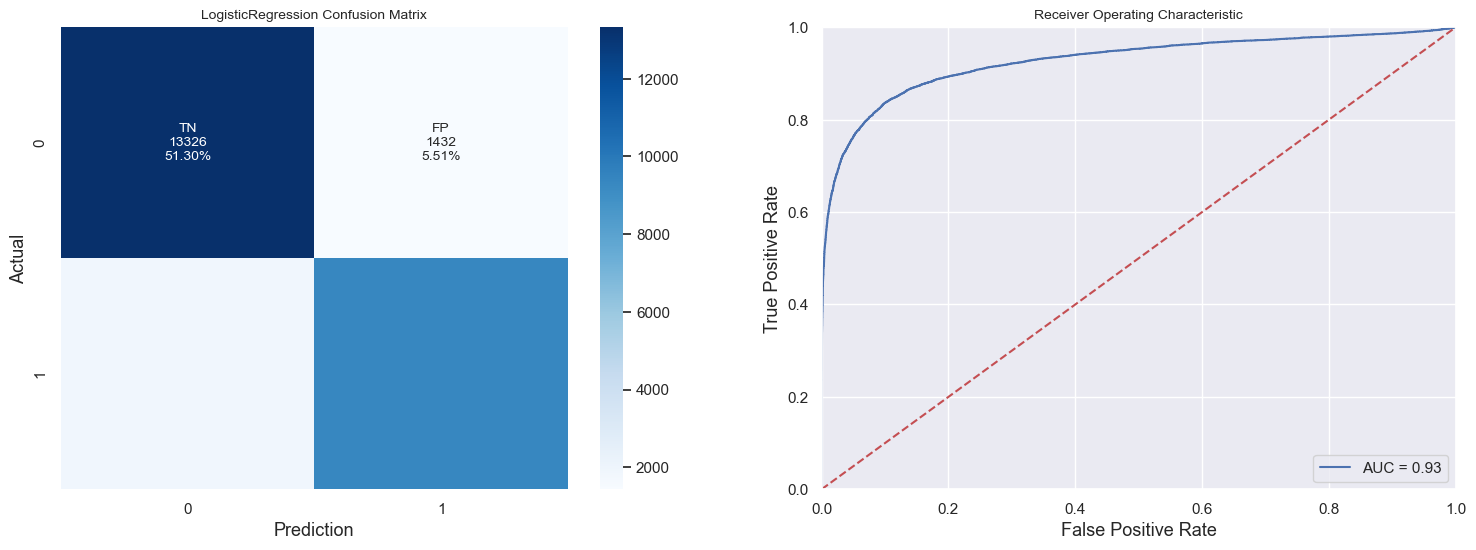

In [112]:
# import the model
from sklearn.linear_model import LogisticRegression

#fit the model
model =LogisticRegression()
model.fit(X_train,y_train)

# prediction
pred_train = model.predict(X_train)
pred_val = model.predict(X_test)

# model name
model_name = str(type(model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print("Accuracy score for training dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

make_classification_report(model,X_val,y_val)

Observations

* The auc roc score is 92.68 %
* But this model is not working good with validation data. And also not predicting the True Positives.

		GAUSSIANNB MODEL

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.86      0.87      0.87     44072
              satisfaction       0.83      0.82      0.82     33856

                  accuracy                           0.85     77928
                 macro avg       0.85      0.84      0.85     77928
              weighted avg       0.85      0.85      0.85     77928

validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.86      0.87      0.86     14758
              satisfaction       0.83      0.81      0.82     11218

                  accuracy                           0.85     25976
                 macro avg       0.84      0.84      0.84     25976
              weighted avg       0.84      0.85      0.84     25976

Accuracy score for traing dataset 0.8481418745508674
Accuracy score for validation dataset 0.8451647674776717
ROC AUC Score : 

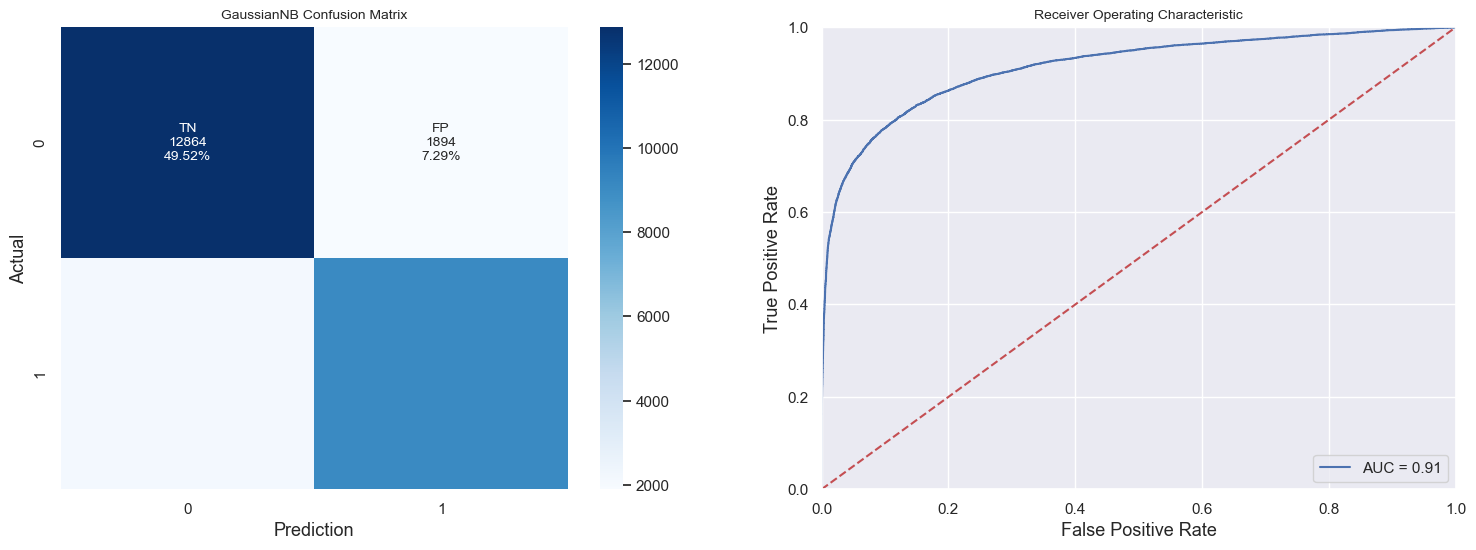

In [113]:
# import the model
from sklearn.naive_bayes import GaussianNB

#fit the model
model =GaussianNB()
model.fit(X_train,y_train)

# prediction
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)

# model name
model_name = str(type(model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

make_classification_report(model,X_val,y_val)

Observations

* The ROC AUC score is 91.58%. But the Recall and F1 scores are low. Thus we can say our model is failing to predict the True Positives
* The Recall and F1 Score of the GaussianNB is more less than Logistic Regresssion.
* This model working better with validation data.

		LINEARSVC MODEL

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.88      0.90      0.89     44072
              satisfaction       0.87      0.83      0.85     33856

                  accuracy                           0.87     77928
                 macro avg       0.87      0.87      0.87     77928
              weighted avg       0.87      0.87      0.87     77928

validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.87      0.90      0.89     14758
              satisfaction       0.87      0.83      0.85     11218

                  accuracy                           0.87     25976
                 macro avg       0.87      0.87      0.87     25976
              weighted avg       0.87      0.87      0.87     25976

Accuracy score for traing dataset 0.8739220819217739
Accuracy score for validation dataset 0.8715352633199877
ROC AUC Score : 9

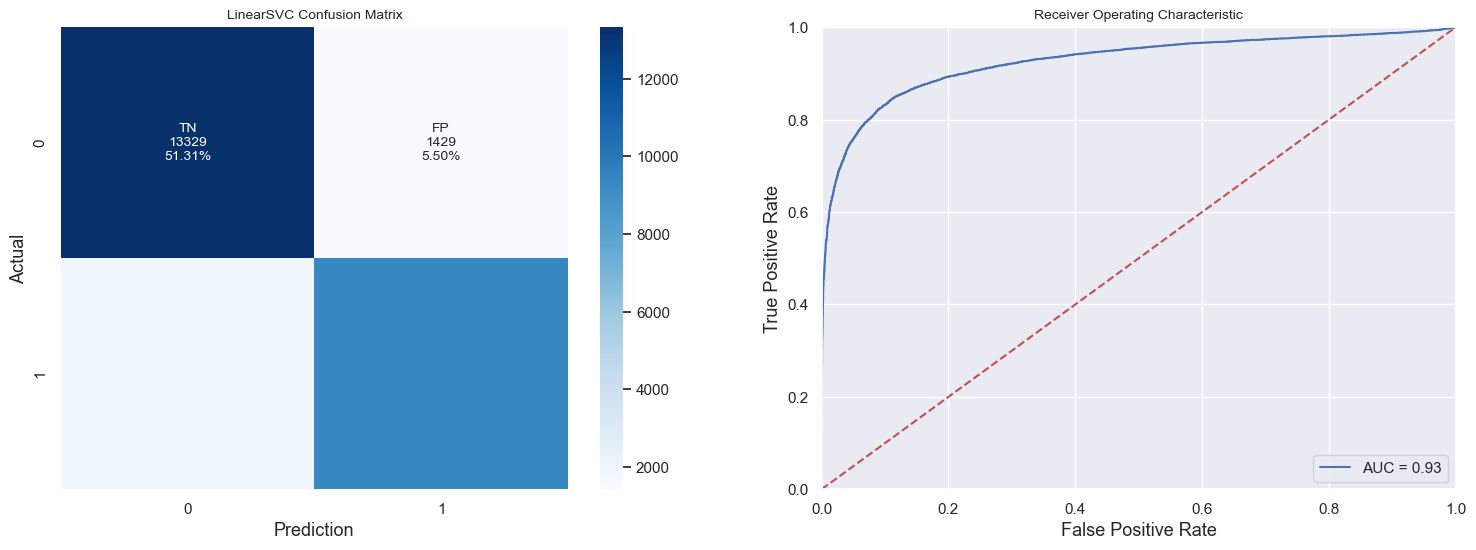

In [115]:
# import the model
from sklearn.svm import LinearSVC

#fit the model
model =LinearSVC()
model.fit(X_train,y_train)

# prediction
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)

# model name
model_name = str(type(model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

make_classification_report(model,X_val,y_val)

		KNEIGHBORSCLASSIFIER MODEL

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.93      0.98      0.96     44072
              satisfaction       0.97      0.91      0.94     33856

                  accuracy                           0.95     77928
                 macro avg       0.95      0.94      0.95     77928
              weighted avg       0.95      0.95      0.95     77928

validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.91      0.96      0.94     14758
              satisfaction       0.95      0.88      0.91     11218

                  accuracy                           0.93     25976
                 macro avg       0.93      0.92      0.92     25976
              weighted avg       0.93      0.93      0.93     25976

Accuracy score for traing dataset 0.9486577353454471
Accuracy score for validation dataset 0.9267015706806283
ROC AU

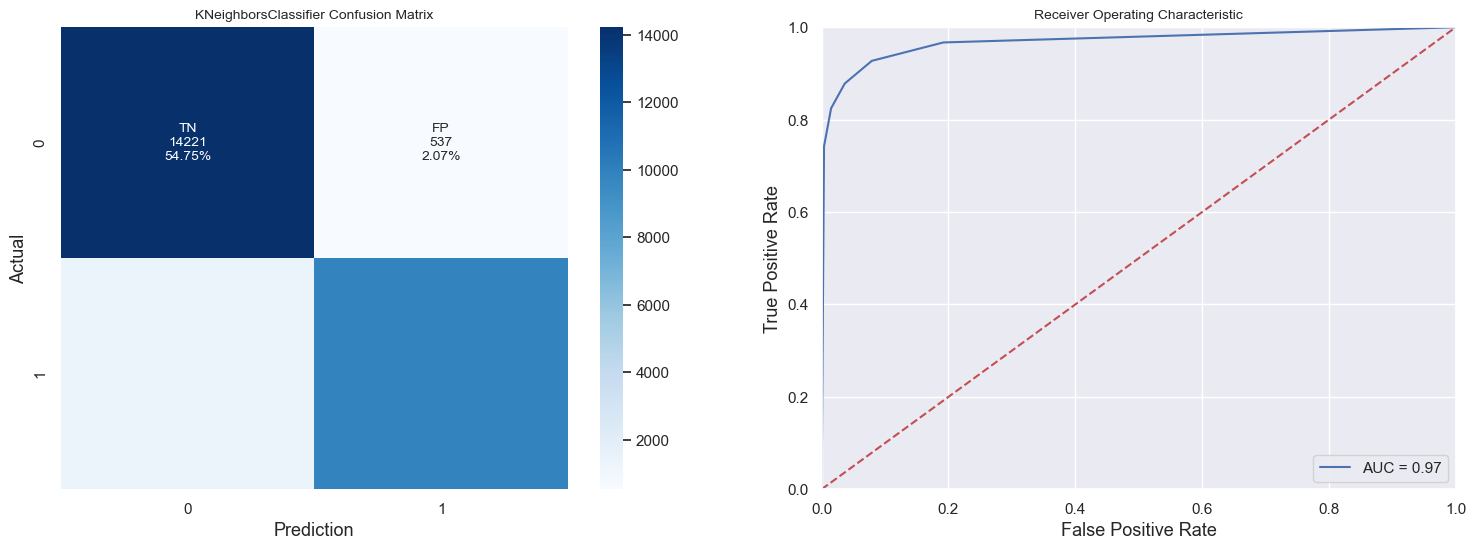

In [116]:
# import the model
from sklearn.neighbors import KNeighborsClassifier

#fit the model
model =KNeighborsClassifier()
model.fit(X_train,y_train)

# prediction
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)

# model name
model_name = str(type(model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

make_classification_report(model,X_val,y_val)

		DECISIONTREECLASSIFIER MODEL

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       1.00      1.00      1.00     44072
              satisfaction       1.00      1.00      1.00     33856

                  accuracy                           1.00     77928
                 macro avg       1.00      1.00      1.00     77928
              weighted avg       1.00      1.00      1.00     77928

validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.95      0.95      0.95     14758
              satisfaction       0.93      0.94      0.94     11218

                  accuracy                           0.95     25976
                 macro avg       0.94      0.94      0.94     25976
              weighted avg       0.95      0.95      0.95     25976

Accuracy score for traing dataset 1.0
Accuracy score for validation dataset 0.9451031721589159
ROC AUC Score : 94.

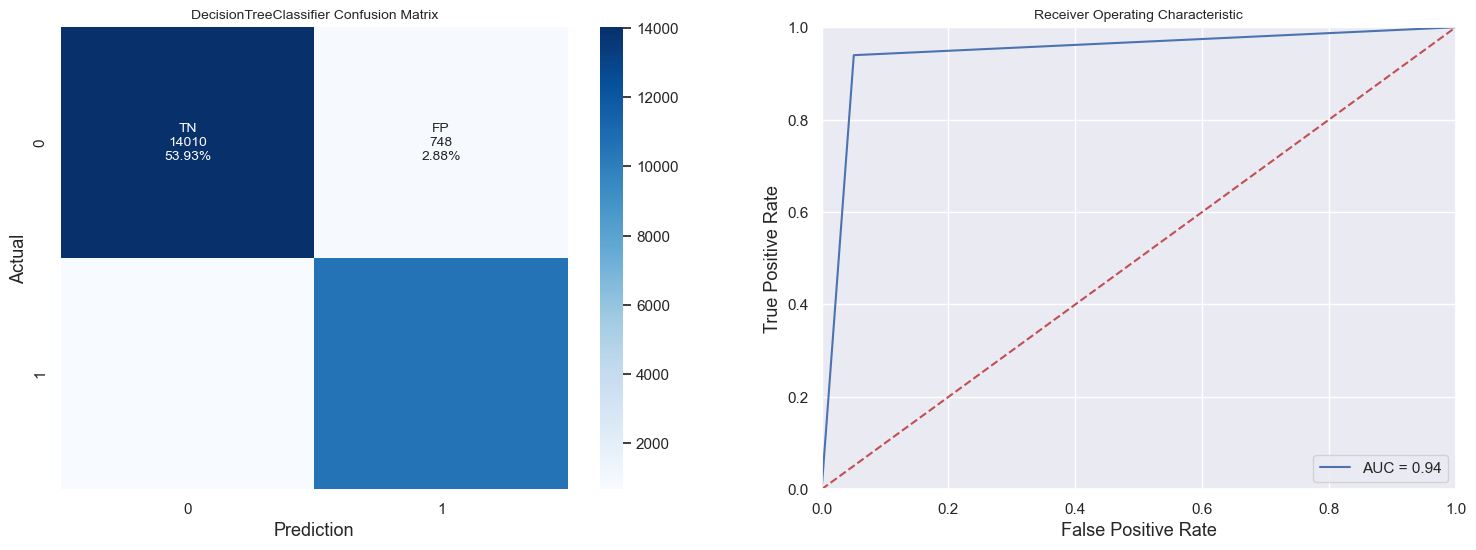

In [117]:
# import the model
from sklearn.tree import DecisionTreeClassifier

#fit the model
model =DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

# prediction
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)

# model name
model_name = str(type(model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

make_classification_report(model,X_val,y_val)


Observations:

* The ROC AUC score is 94.71%.
* The Recall and F1 scores are good.
* But model will cause overfitting. as the accuracy score for training dataset is 1.

		RANDOMFORESTCLASSIFIER MODEL

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       1.00      1.00      1.00     44072
              satisfaction       1.00      1.00      1.00     33856

                  accuracy                           1.00     77928
                 macro avg       1.00      1.00      1.00     77928
              weighted avg       1.00      1.00      1.00     77928

validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.95      0.98      0.97     14758
              satisfaction       0.97      0.94      0.95     11218

                  accuracy                           0.96     25976
                 macro avg       0.96      0.96      0.96     25976
              weighted avg       0.96      0.96      0.96     25976

Accuracy score for traing dataset 1.0
Accuracy score for validation dataset 0.9612719433323067
ROC AUC Score : 99.

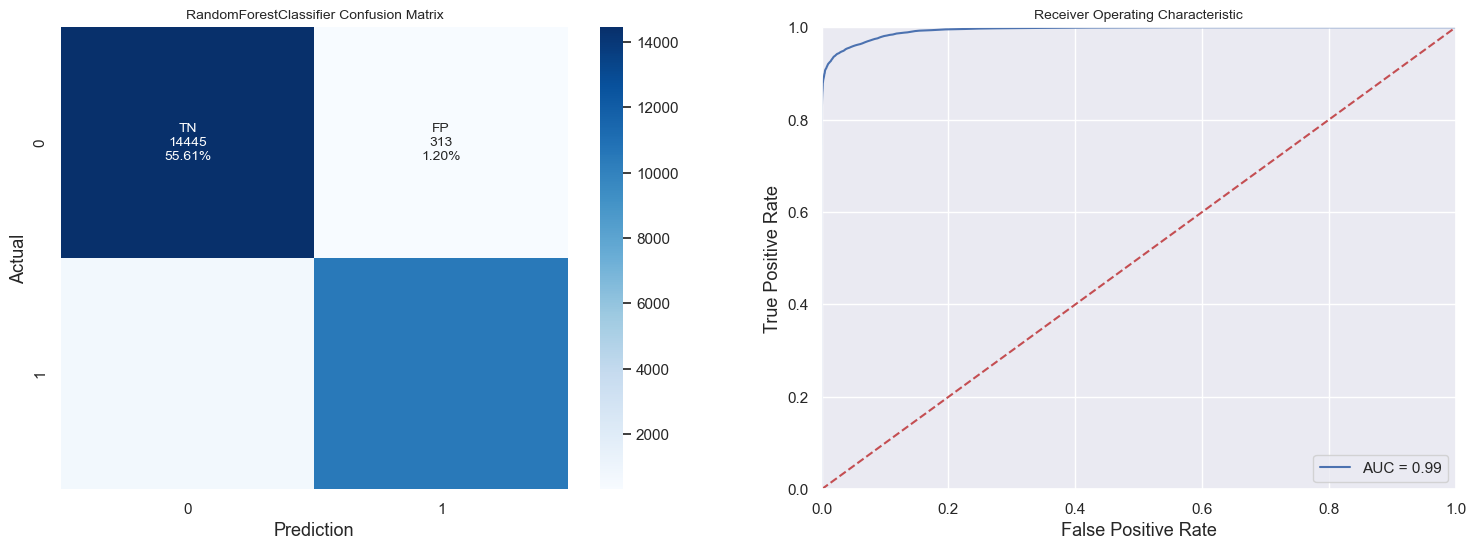

In [118]:
#import the model

from sklearn.ensemble import RandomForestClassifier

#fit the model
model =RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

# prediction
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)

# model name
model_name = str(type(model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

make_classification_report(model,X_val,y_val)

Observations:

* The ROC AUC score is 99.37%.
* The Recall and F1 scores are good.
* But model can cause overfitting, as the accuracy score for training dataset is 1,
* But after hypertunning we can train this model model is working much better with the validation dataset set as compared to other trained model.

		ADABOOSTCLASSIFIER MODEL

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.93      0.94      0.94     44072
              satisfaction       0.92      0.91      0.92     33856

                  accuracy                           0.93     77928
                 macro avg       0.93      0.93      0.93     77928
              weighted avg       0.93      0.93      0.93     77928

validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.93      0.94      0.94     14758
              satisfaction       0.92      0.91      0.91     11218

                  accuracy                           0.93     25976
                 macro avg       0.93      0.92      0.93     25976
              weighted avg       0.93      0.93      0.93     25976

Accuracy score for traing dataset 0.9284211066625603
Accuracy score for validation dataset 0.9269710502001848
ROC AUC 

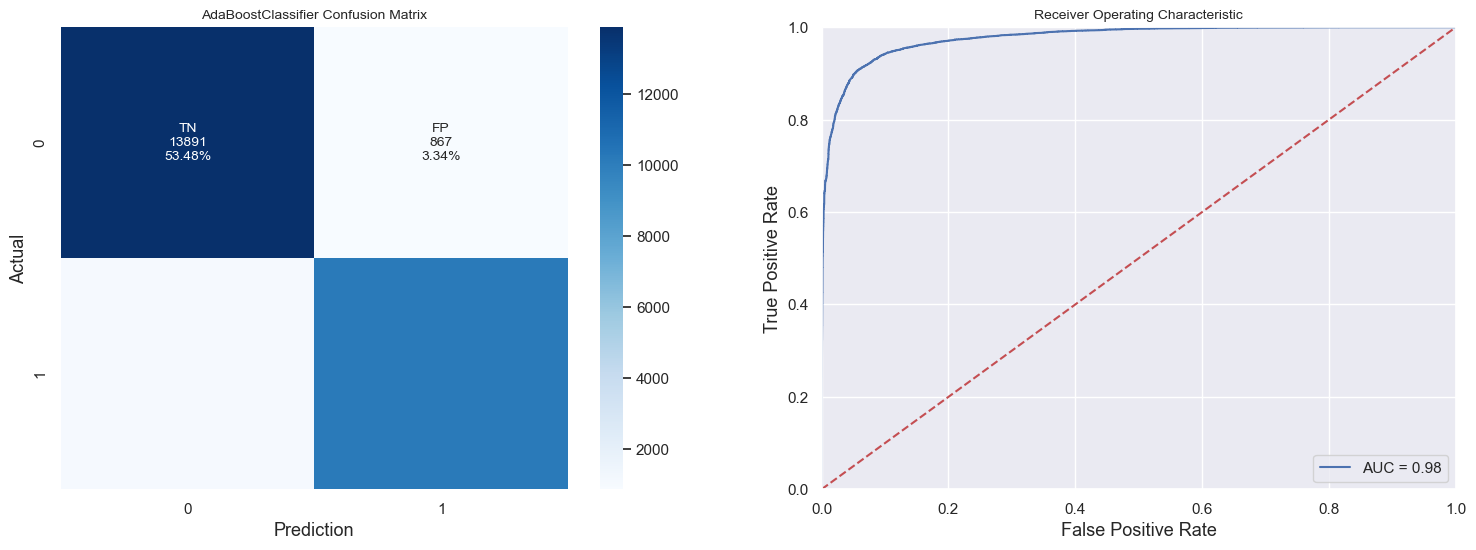

In [119]:
from sklearn.ensemble import AdaBoostClassifier
#fit the model
model =AdaBoostClassifier()
model.fit(X_train,y_train)

# prediction
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)

# model name
model_name = str(type(model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

make_classification_report(model,X_val,y_val)
                        

Observations:

* The ROC AUC score is 97.74%.
* The Recall and F1 scores are good but comapritively lower than the random forest.

		XGBCLASSIFIER MODEL

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.97      0.99      0.98     44072
              satisfaction       0.99      0.96      0.97     33856

                  accuracy                           0.98     77928
                 macro avg       0.98      0.98      0.98     77928
              weighted avg       0.98      0.98      0.98     77928

validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.96      0.98      0.97     14758
              satisfaction       0.97      0.94      0.96     11218

                  accuracy                           0.96     25976
                 macro avg       0.96      0.96      0.96     25976
              weighted avg       0.96      0.96      0.96     25976

Accuracy score for traing dataset 0.9782491530643671
Accuracy score for validation dataset 0.9636202648598706
ROC AUC Score

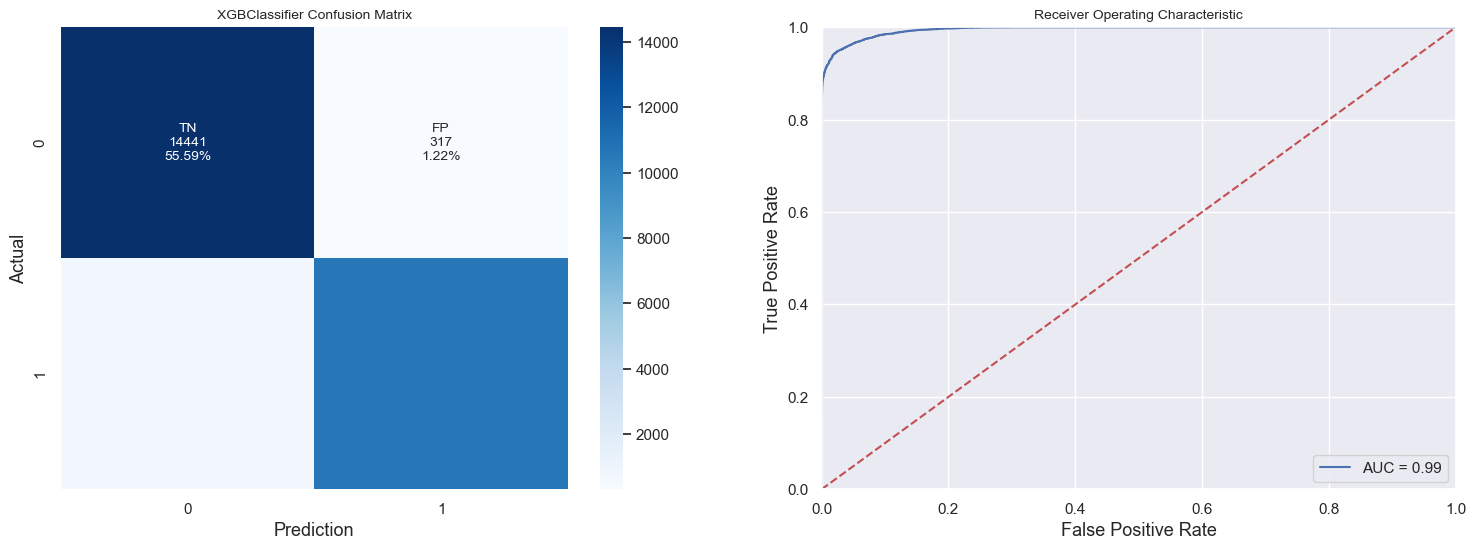

In [120]:
from xgboost import XGBClassifier

#fit the model
model =XGBClassifier()
model.fit(X_train,y_train)

# prediction
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)

# model name
model_name = str(type(model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

make_classification_report(model,X_val,y_val)

Observations:

* The ROC AUC score is 98.72%.slightly higher than gradient Boosting.
* The Recall and F1 scores are good.
* We can choose this datadset to train our model. Ans can also improve our model with Hyperparameter tunning.

In [122]:
%%time
xgb_model = XGBClassifier(random_state=42)

CPU times: total: 0 ns
Wall time: 0 ns


In [123]:
xgb_model.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [124]:
xgb_rscv_Parameters = {
    'max_depth' : [3,4,5,6],
    'learning_rate':[0.1,0.15,0.175],
    'colsample_bytree' : [0.4,0.6,0.8,1.0],
    'n_estimators' : [150,250,500,750],
    'gamma':[0.25,0.5],
    'subsample': [0.6,0.7,0.8,1],
    'scale_pos_weight': [12.5,13.5,14],  ### Ratio of negative to positive class   
}
xgb_model = XGBClassifier(random_state=42,n_jobs=-1)

In [125]:
initial_params = {
    "random_state":42,
    "n_jobs":-1
}

In [126]:
xgb_rscv_model = RandomizedSearchCV(estimator = xgb_model,
                                      param_distributions=xgb_rscv_Parameters,
                                      n_iter=50,
                                      cv=3,
                                      scoring= 'roc_auc',
                                      verbose=2)

In [127]:
%%time
xgb_rscv_model.fit(X_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END colsample_bytree=1.0, gamma=0.25, learning_rate=0.1, max_depth=3, n_estimators=150, scale_pos_weight=14, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.25, learning_rate=0.1, max_depth=3, n_estimators=150, scale_pos_weight=14, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=1.0, gamma=0.25, learning_rate=0.1, max_depth=3, n_estimators=150, scale_pos_weight=14, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=6, n_estimators=150, scale_pos_weight=14, subsample=1; total time=   0.6s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=6, n_estimators=150, scale_pos_weight=14, subsample=1; total time=   0.6s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=6, n_estimators=150, scale_pos_weight=14, subsample=1; total time=   0.7s
[CV] END colsample_bytree=0.6, gamma=0.25, learning_rate=0.

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=-1,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=50,
                   param_distributions={'colsample_bytree': [0.4, 0.6, 0.8,
                                                             1.0],
                                        'gamma': [0.25, 0.5],
                                        'learning_rate': [0.1, 0.15, 0.175],
                                        'max_depth': [3, 4, 5, 6],
                                        'n_estimators': [150, 250, 500, 750],
                                        'scale_pos_weight': [12.5, 13.5, 14],
                                        'subsample': [0.6, 0.7, 0.8, 1]},
                   scoring='roc_auc', verbose=2)

In [129]:
xgb_rscv_model.best_score_

0.9945727000140417

In [131]:
best_rscv_params={'n_estimators': 750,
 'min_split_gain': 0.225,
 'min_data_in_leaf': 550,
 'min_child_weight': 4,
 'max_depth': 6,
 'learning_rate': 0.055,
 'colsample_bytree': 0.3,
 'boosting_type': 'gbdt',
 'random_state': 42,
 'n_jobs': -1}

		XGBCLASSIFIER MODEL

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.97      0.99      0.98     44072
              satisfaction       0.98      0.96      0.97     33856

                  accuracy                           0.97     77928
                 macro avg       0.98      0.97      0.97     77928
              weighted avg       0.97      0.97      0.97     77928

validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.95      0.98      0.97     14758
              satisfaction       0.97      0.94      0.95     11218

                  accuracy                           0.96     25976
                 macro avg       0.96      0.96      0.96     25976
              weighted avg       0.96      0.96      0.96     25976

Accuracy score for traing dataset 0.9743994456421312
Accuracy score for validation dataset 0.9616184170003079
ROC AUC Score

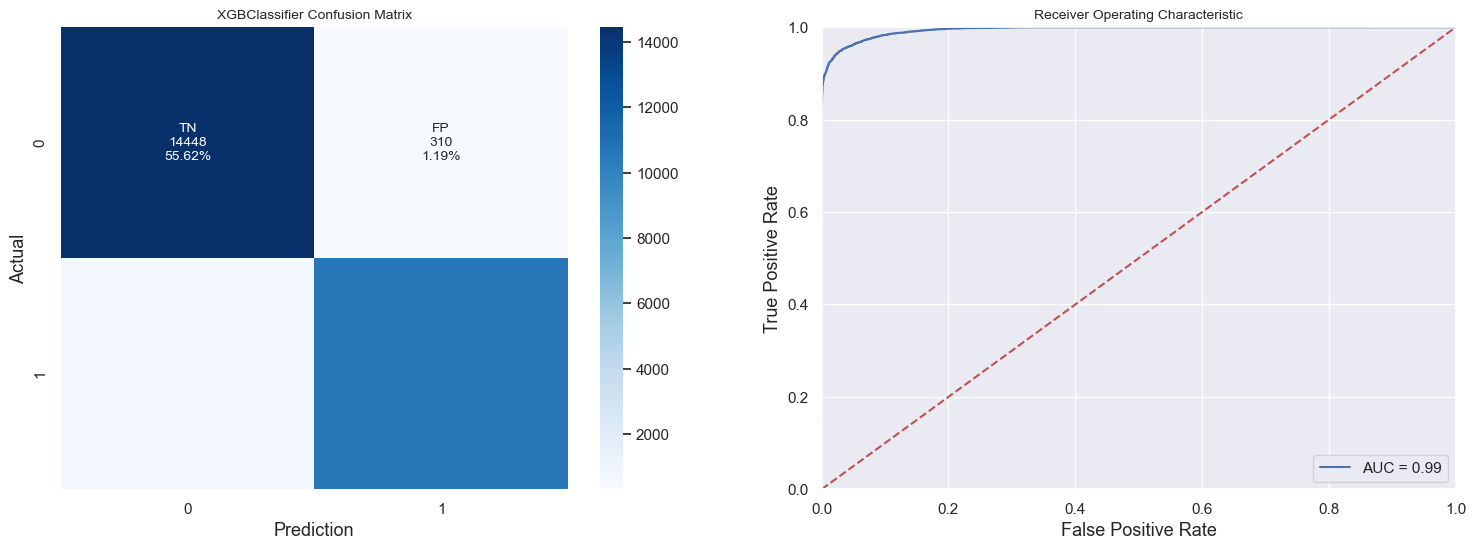

In [132]:
from xgboost import XGBClassifier

#fit the model
xgb_model =XGBClassifier(**best_rscv_params)
xgb_model.fit(X_train,y_train)

# prediction
pred_train = xgb_model.predict(X_train)
pred_val = xgb_model.predict(X_val)

# model name
model_name = str(type(xgb_model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

make_classification_report(xgb_model,X_val,y_val)

We will choose this model to train our dataset because this traing model is performing best among all the models.
* Before Hyperparameter tunning the Accuracy score for traing and validation dataset were .941, 0.940
* After Hyperparameter tunning the Accuracy score for traing and validation dataset is .973, 0.960 which is the highest accuracy for both training and validation dataset together.

In [133]:
xgb_feature_importance = xgb_model.feature_importances_
xgb_feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_feature_importance
}).sort_values('Importance', ascending=False)
xgb_feature_importance_df

Feature  Importance
2               Inflight wifi service    0.130015
23     Type of Travel_Personal Travel    0.129105
22     Type of Travel_Business travel    0.127621
7                     Online boarding    0.100939
20       Customer Type_Loyal Customer    0.087494
21    Customer Type_disloyal Customer    0.058620
24                     Class_Business    0.057782
25                          Class_Eco    0.056905
9              Inflight entertainment    0.038295
8                        Seat comfort    0.029734
4              Ease of Online booking    0.023616
10                   On-board service    0.021853
15                        Cleanliness    0.020369
13                    Checkin service    0.019794
12                   Baggage handling    0.017240
14                   Inflight service    0.015148
11                   Leg room service    0.011149
3   Departure/Arrival time convenient    0.008521
5                       Gate location    0.008341
0                                 Age    0.007926
6                      Food and drink    0.007503
26                     Class_Eco Plus    0.006111
1                     Flight Distance    0.004773
17           Arrival Delay in Minutes    0.004236
19                        Gender_Male    0.003345
16         Departure Delay in Minutes    0.002006
18                      Gender_Female    0.001560

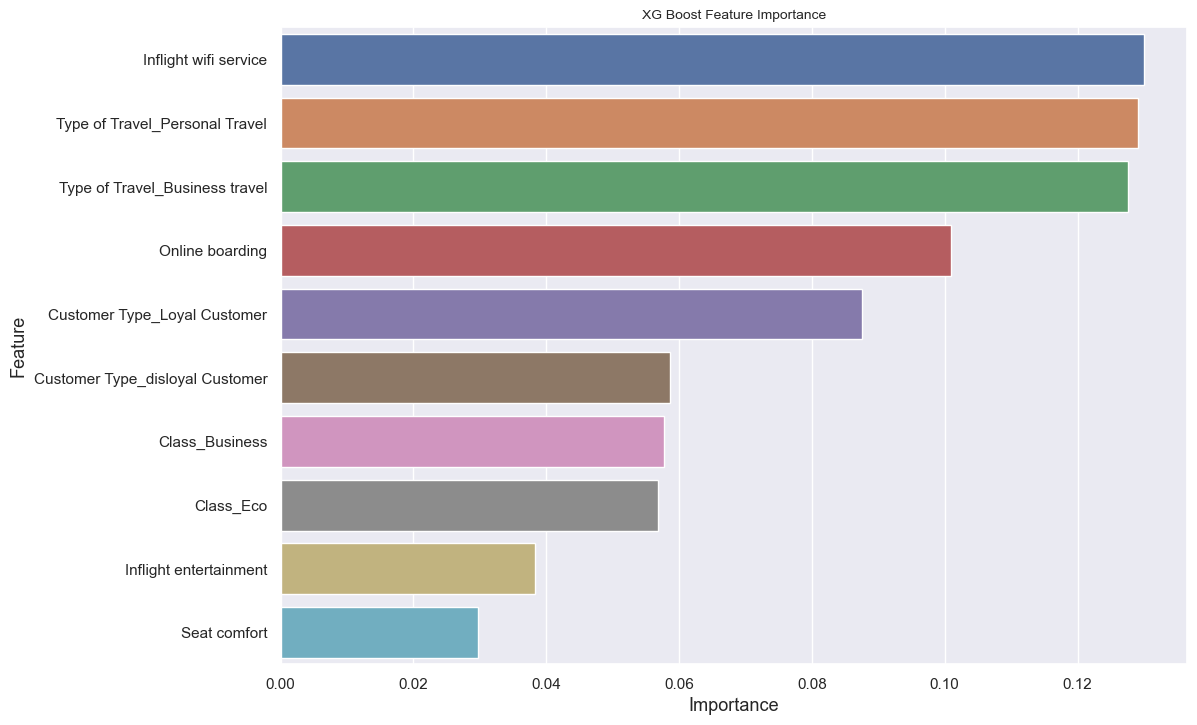

In [134]:
plt.title('XG Boost Feature Importance')
sns.barplot(data=xgb_feature_importance_df.head(10), x='Importance', y='Feature');

		XGBCLASSIFIER MODEL

Test data
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.95      0.98      0.97     14622
              satisfaction       0.97      0.94      0.96     11354

                  accuracy                           0.96     25976
                 macro avg       0.96      0.96      0.96     25976
              weighted avg       0.96      0.96      0.96     25976

Accuracy score for traing dataset 0.9743994456421312
Accuracy score for test dataset 0.9616184170003079
ROC AUC Score : 99.46%



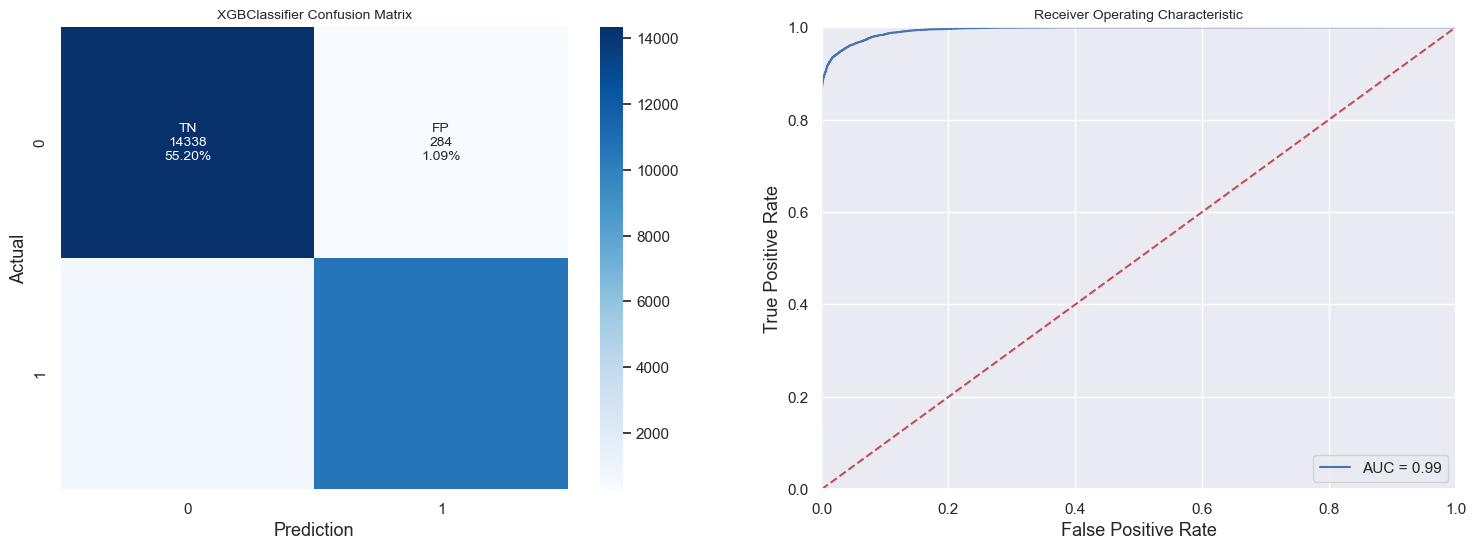

In [135]:
#import the model

from xgboost import XGBClassifier

#fit the model
xgb_model =XGBClassifier(**best_rscv_params)
xgb_model.fit(X_train,y_train)

# prediction
pred_train = xgb_model.predict(X_train)
pred_test = xgb_model.predict(X_test)

model_name = str(type(xgb_model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")


print('Test data')
print(classification_report(y_test, pred_test,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for test dataset",accuracy_score(y_val, pred_val))

make_classification_report(xgb_model,X_test,y_test)

Observations

* The accuracy for dataset for test is very good.
* The auc roc score is 99.45%
* The precision, and recall for the dataset are good too

Log_reg : 

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.88      0.90      0.89     44072
              satisfaction       0.87      0.84      0.85     33856

                  accuracy                           0.87     77928
                 macro avg       0.87      0.87      0.87     77928
              weighted avg       0.87      0.87      0.87     77928

Validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.88      0.90      0.89     14758
              satisfaction       0.87      0.83      0.85     11218

                  accuracy                           0.87     25976
                 macro avg       0.87      0.87      0.87     25976
              weighted avg       0.87      0.87      0.87     25976

ROC AUC Score : 92.68%



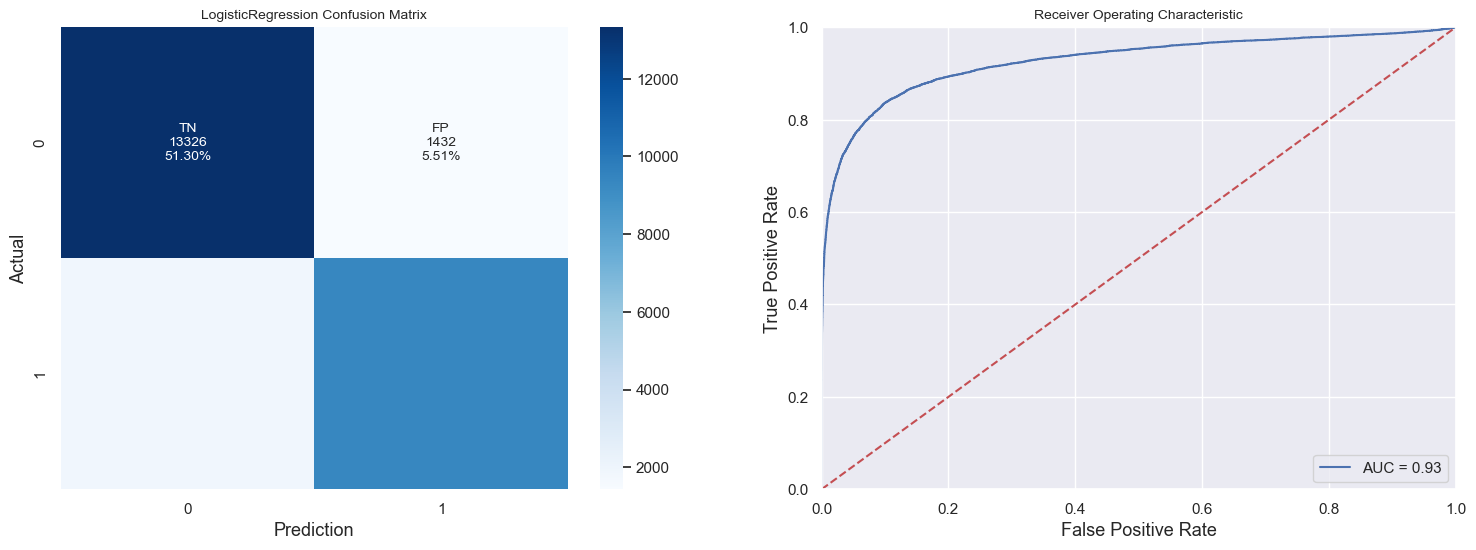

Gaus_NB : 

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.86      0.87      0.87     44072
              satisfaction       0.83      0.82      0.82     33856

                  accuracy                           0.85     77928
                 macro avg       0.85      0.84      0.85     77928
              weighted avg       0.85      0.85      0.85     77928

Validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.86      0.87      0.86     14758
              satisfaction       0.83      0.81      0.82     11218

                  accuracy                           0.85     25976
                 macro avg       0.84      0.84      0.84     25976
              weighted avg       0.84      0.85      0.84     25976

ROC AUC Score : 91.44%



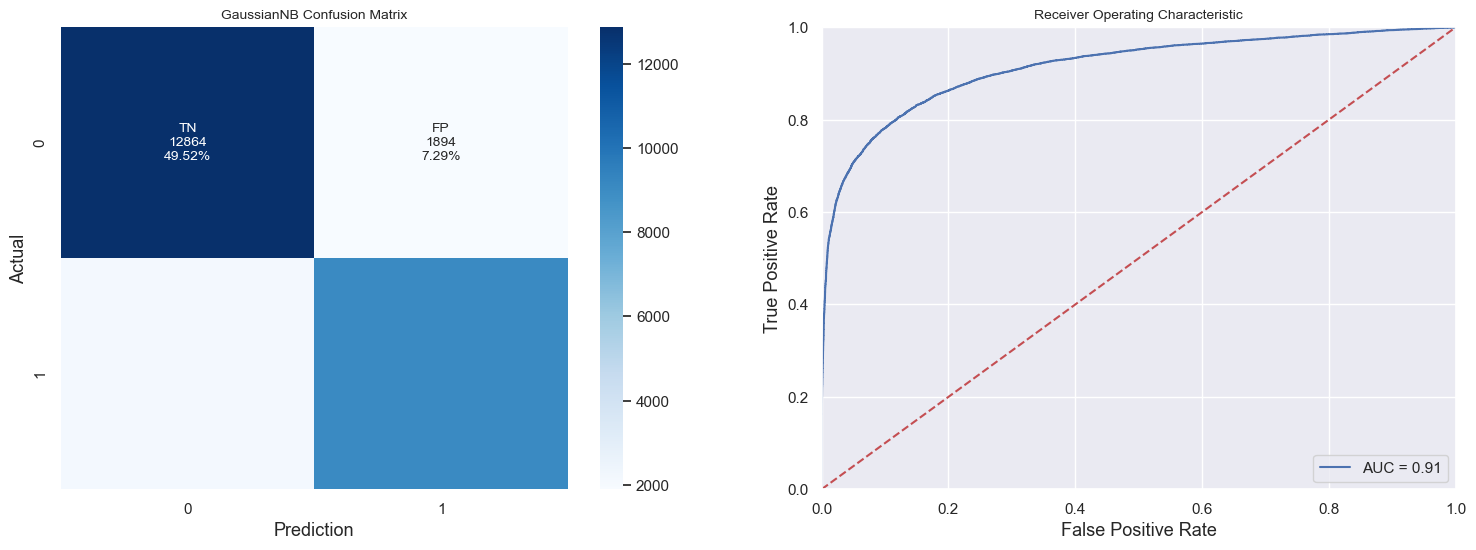

KNN : 

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.93      0.98      0.96     44072
              satisfaction       0.97      0.91      0.94     33856

                  accuracy                           0.95     77928
                 macro avg       0.95      0.94      0.95     77928
              weighted avg       0.95      0.95      0.95     77928

Validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.91      0.96      0.94     14758
              satisfaction       0.95      0.88      0.91     11218

                  accuracy                           0.93     25976
                 macro avg       0.93      0.92      0.92     25976
              weighted avg       0.93      0.93      0.93     25976

ROC AUC Score : 96.86%



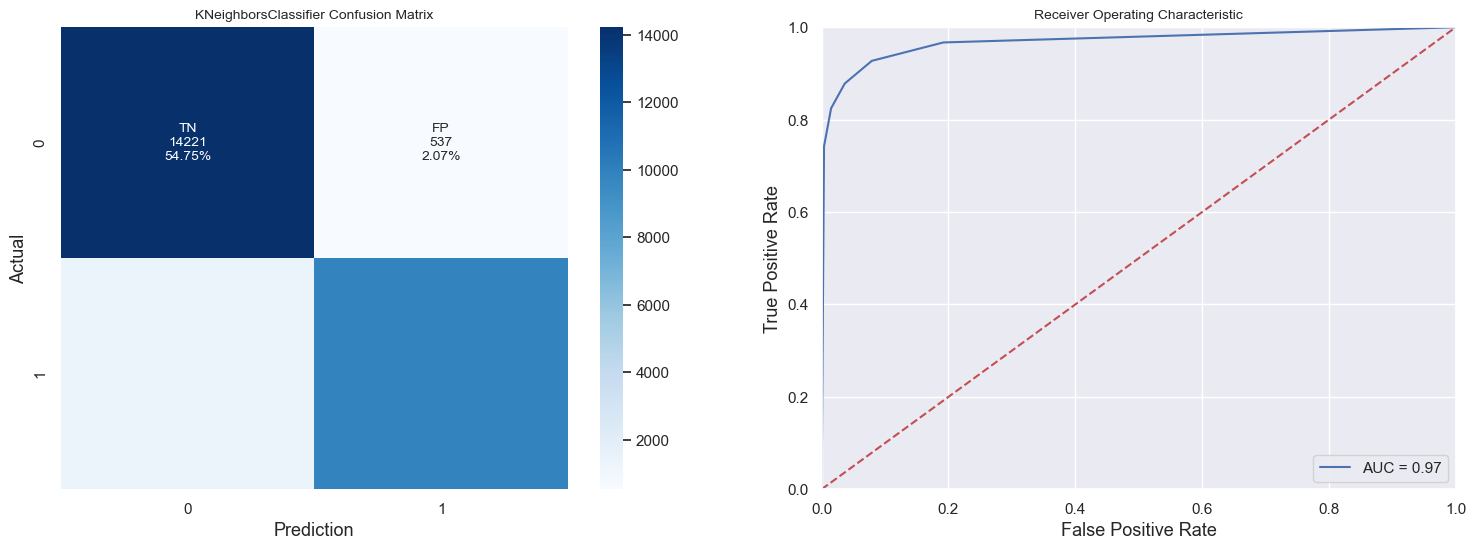

DT : 

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.88      0.90      0.89     44072
              satisfaction       0.87      0.83      0.85     33856

                  accuracy                           0.87     77928
                 macro avg       0.87      0.87      0.87     77928
              weighted avg       0.87      0.87      0.87     77928

Validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.87      0.90      0.89     14758
              satisfaction       0.87      0.83      0.85     11218

                  accuracy                           0.87     25976
                 macro avg       0.87      0.87      0.87     25976
              weighted avg       0.87      0.87      0.87     25976

ROC AUC Score : 92.64%



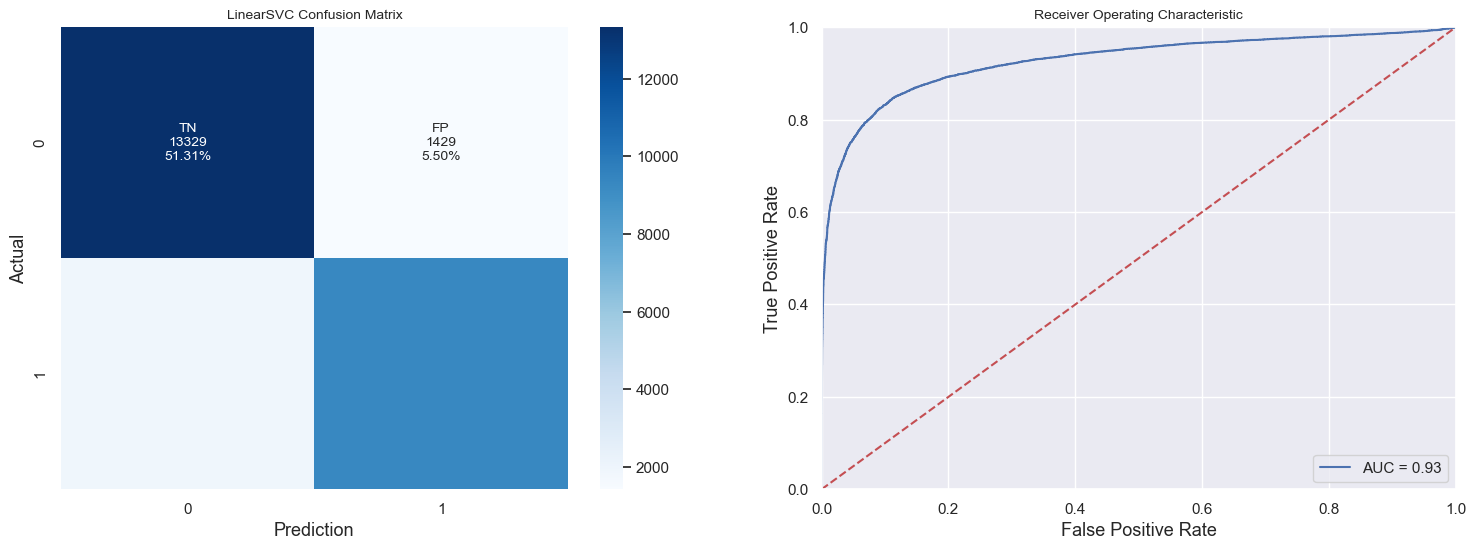

Ran_forest : 

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       1.00      1.00      1.00     44072
              satisfaction       1.00      1.00      1.00     33856

                  accuracy                           1.00     77928
                 macro avg       1.00      1.00      1.00     77928
              weighted avg       1.00      1.00      1.00     77928

Validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.95      0.95      0.95     14758
              satisfaction       0.93      0.94      0.94     11218

                  accuracy                           0.94     25976
                 macro avg       0.94      0.94      0.94     25976
              weighted avg       0.94      0.94      0.94     25976

ROC AUC Score : 94.41%



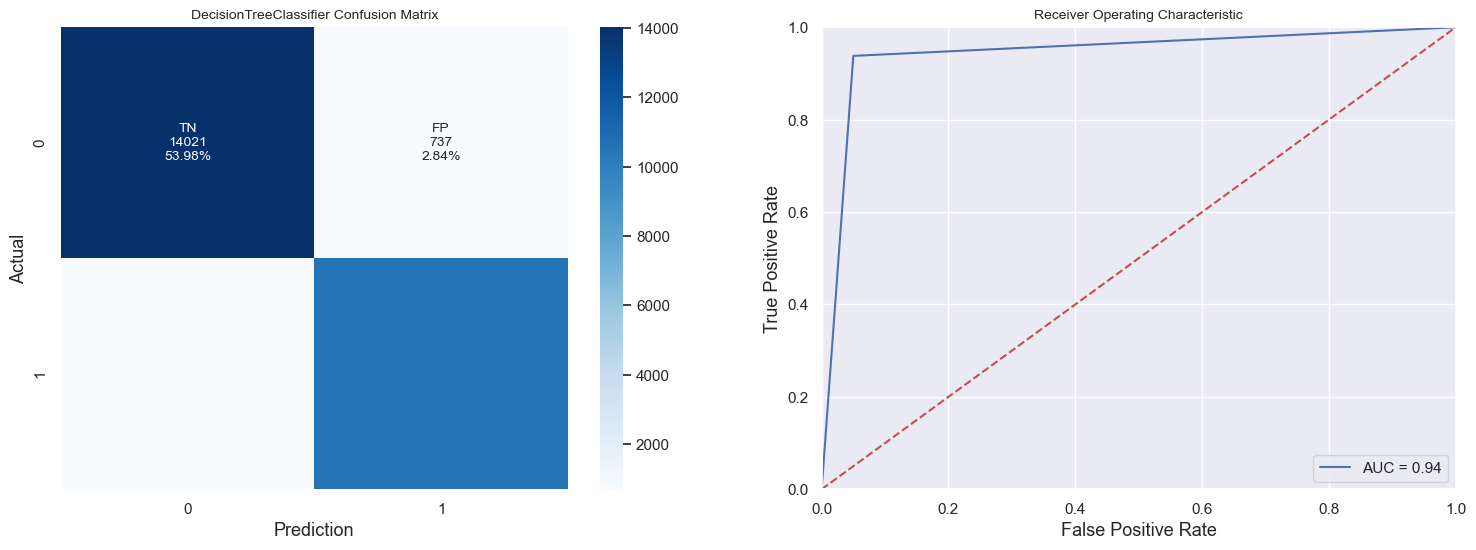

AdaBoost : 

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       1.00      1.00      1.00     44072
              satisfaction       1.00      1.00      1.00     33856

                  accuracy                           1.00     77928
                 macro avg       1.00      1.00      1.00     77928
              weighted avg       1.00      1.00      1.00     77928

Validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.95      0.98      0.97     14758
              satisfaction       0.97      0.94      0.95     11218

                  accuracy                           0.96     25976
                 macro avg       0.96      0.96      0.96     25976
              weighted avg       0.96      0.96      0.96     25976

ROC AUC Score : 99.37%



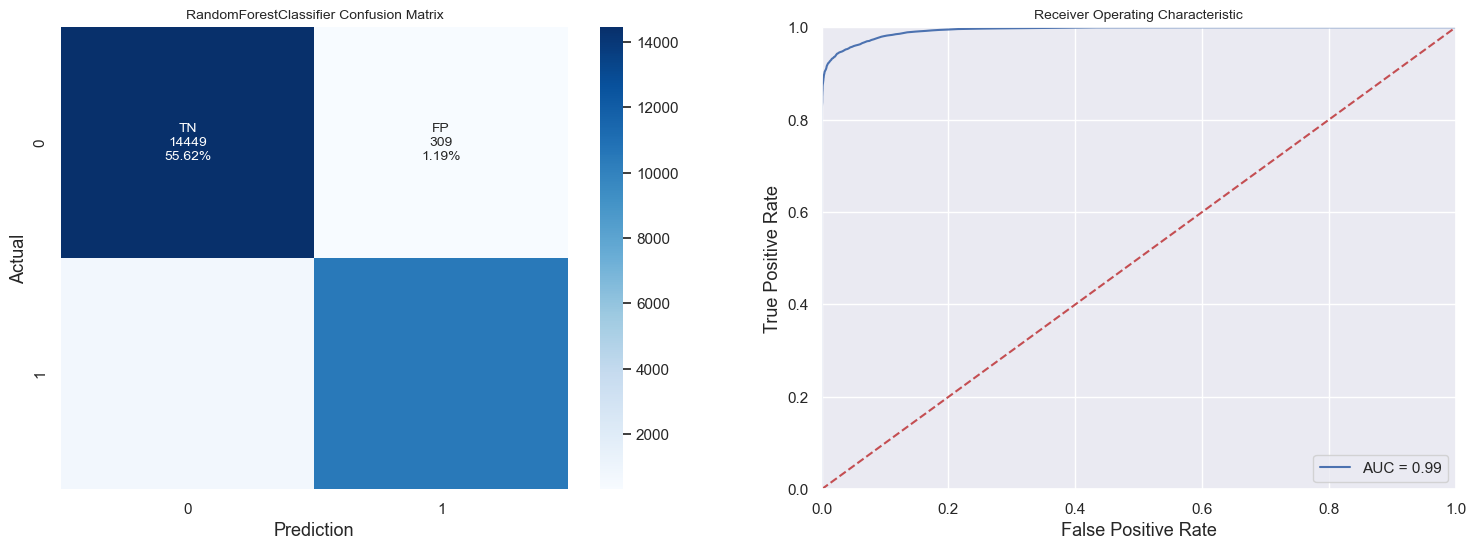

Grad_boost : 

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.93      0.94      0.94     44072
              satisfaction       0.92      0.91      0.92     33856

                  accuracy                           0.93     77928
                 macro avg       0.93      0.93      0.93     77928
              weighted avg       0.93      0.93      0.93     77928

Validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.93      0.94      0.94     14758
              satisfaction       0.92      0.91      0.91     11218

                  accuracy                           0.93     25976
                 macro avg       0.93      0.92      0.93     25976
              weighted avg       0.93      0.93      0.93     25976

ROC AUC Score : 97.70%



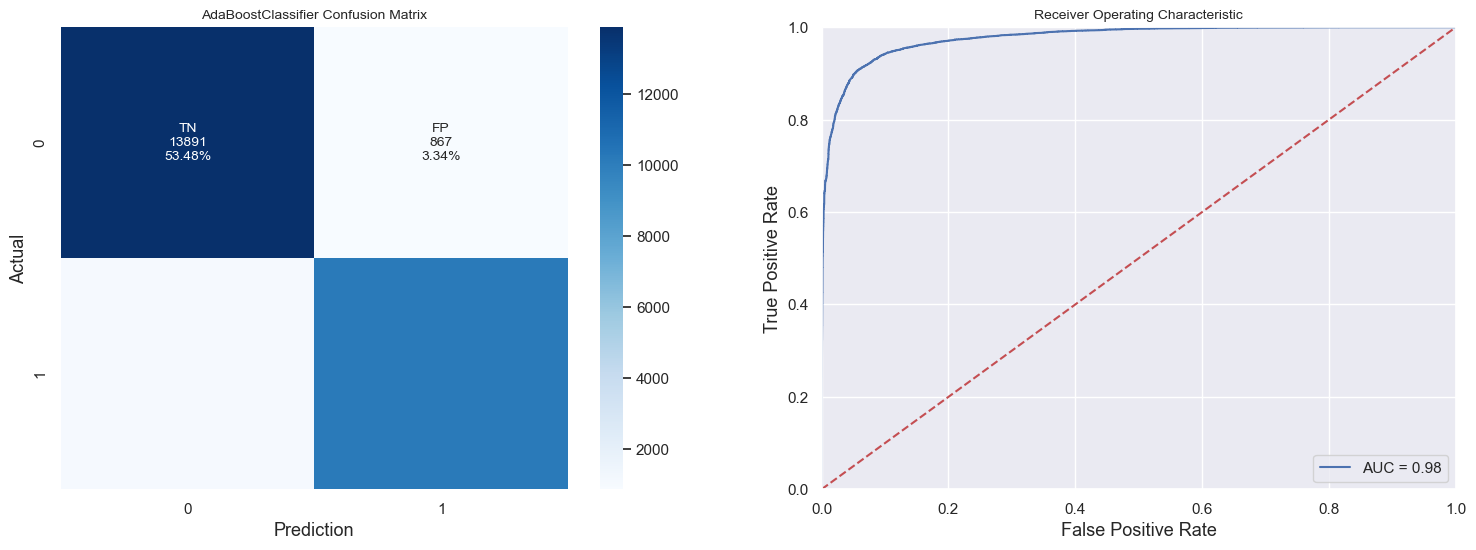

XGBoost : 

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.94      0.96      0.95     44072
              satisfaction       0.95      0.92      0.93     33856

                  accuracy                           0.94     77928
                 macro avg       0.94      0.94      0.94     77928
              weighted avg       0.94      0.94      0.94     77928

Validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.94      0.96      0.95     14758
              satisfaction       0.94      0.92      0.93     11218

                  accuracy                           0.94     25976
                 macro avg       0.94      0.94      0.94     25976
              weighted avg       0.94      0.94      0.94     25976

ROC AUC Score : 98.70%



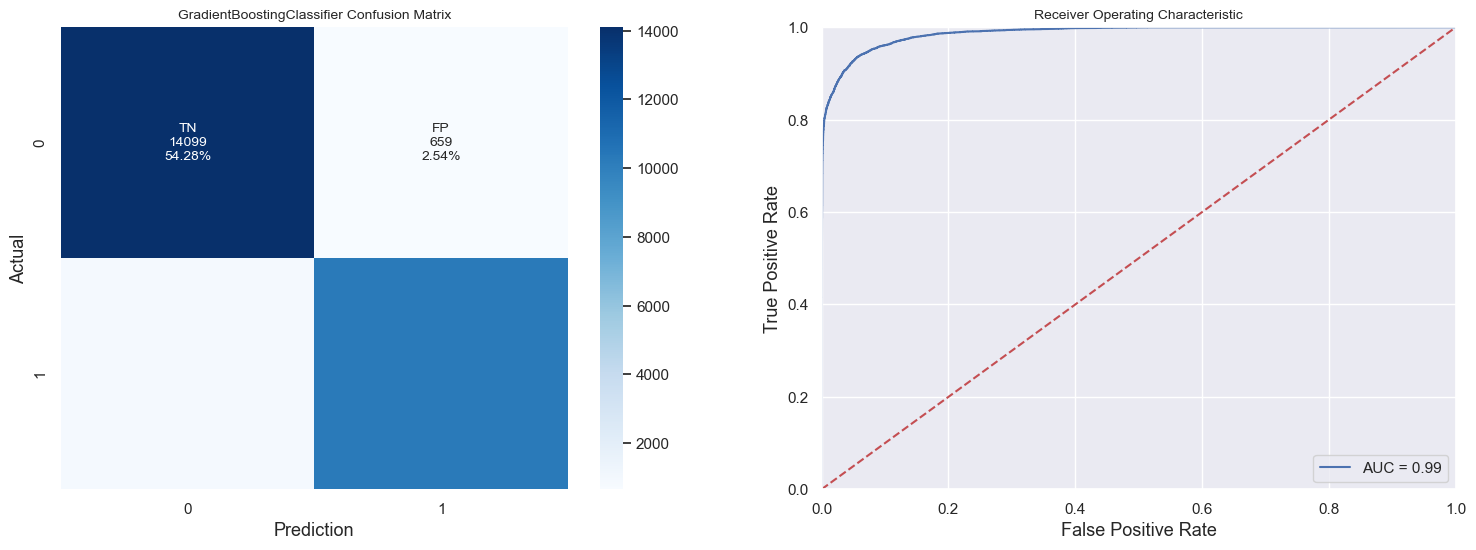

In [136]:
# putting all together at one place 
logisreg_clf =LogisticRegression()
GNB_clf = GaussianNB()
LSVC_clf = LinearSVC()
KN_clf = KNeighborsClassifier()
DT_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
adb_clf= AdaBoostClassifier()
GB_clf = GradientBoostingClassifier()
XGB_clf = XGBClassifier()

clf_list = [logisreg_clf,GNB_clf,KN_clf,LSVC_clf,DT_clf ,rf_clf,adb_clf,GB_clf,XGB_clf]
clf_name_list = ['Log_reg','Gaus_NB','KNN','DT','Ran_forest','AdaBoost','Grad_boost','XGBoost']

for clf in clf_list:
    clf.fit(X_train,y_train)

train_acc_list = []
test_acc_list = []

for clf,name in zip(clf_list,clf_name_list):
    
    pred_train = clf.predict(X_train)
    pred_val = clf.predict(X_val)
    
    print(name,': \n')

    print('Training part:')
    print(classification_report(y_train, pred_train,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
    print('Validation part:')
    print(classification_report(y_val, pred_val,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
      
    train_acc_list.append(accuracy_score(y_train, pred_train))
    test_acc_list.append(accuracy_score(y_val, pred_val))  

    make_classification_report(clf,X_val,y_val) 

In [138]:
train_acc_list

[0.8745508674674058,
 0.8481418745508674,
 0.9486577353454471,
 0.8739220819217739,
 1.0,
 0.9999743352838517,
 0.9284211066625603,
 0.9435504568319475]

Observation

* clearly from the above graph we can predict that Xgboost is performing best for our model, so we can use them to train our model that we already did above

### Conclusion
* The goal of the project is to build a model to find out The Airline passenger satisfaction level:neutral or dissatisfaction', 'satisfaction'
* I have performed data analysis, data preprocessing, and data modelling with multiple machine learning models to achieve this. I have also extensively tuned the hyperparameters of XG Boost  to achieve higher recall and F1-Score.
* The model is performing very good with the test data too.
* This project has been a great exercise for me to understand the concepts of machine learning. There are so many limitations with this model as the model is built only on the features that are provided in the dataset. There is always an improvement when it comes to Machine Learning models. Thus, with limited resources and time I have developed a reasonable model. With more research and more time, the performance of the model can be improved.